In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Creating a folder path
path = r'C:\Users\Lenovo\Desktop\Career Foundry\Achievement 6'

In [5]:
#Using the os.path.function to import the cleaned file
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid_clean.csv'), index_col = False)

In [9]:
df.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,484380.000000,484380.000000,484380.000000,484380.000000
mean,2021.400000,6.200000,9.547962,10.316826
std,1.083206,3.350625,51.007158,53.973307
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,0.000000,0.000000
75%,2022.000000,9.000000,6.000000,6.000000
max,2023.000000,12.000000,5094.000000,5094.000000


In [11]:
df.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2023-09-24,2020-01-01,2020-01-31,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
1,2023-09-24,2020-02-01,2020-02-29,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
2,2023-09-24,2020-03-01,2020-03-31,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
3,2023-09-24,2020-04-01,2020-04-30,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
4,2023-09-24,2020-05-01,2020-05-31,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN


In [13]:
df.shape

(484380, 13)

In [15]:
matplotlib.__version__

'3.8.4'

In [19]:
df.dtypes

Data As Of             object
Start Date             object
End Date               object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object

In [21]:
#Checking for mixed data:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19460\1369412091.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19460\1369412091.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19460\1369412091.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19460\1369412091.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19460\1369412091.py

Flag


In [23]:
#Dropping Flag Column as it is not necessary for Analysis:
df_dropped = df.drop('Flag', axis=1)  # axis=1 indicates we are dropping a column

In [25]:
df_dropped.dtypes

Data As Of             object
Start Date             object
End Date               object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
dtype: object

In [27]:
df_dropped.corr()

ValueError: could not convert string to float: '2023-09-24'

In [29]:
df=df_dropped

In [33]:
# Convert data types
df['Data As Of'] = pd.to_datetime(df['Data As Of'])
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])
df['Year'] = df['Year'].astype('float64')
df['Month'] = df['Month'].astype('float64')
df['State'] = df['State'].astype('category')
df['Condition Group'] = df['Condition Group'].astype('category')
df['Condition'] = df['Condition'].astype('category')
df['ICD10_codes'] = df['ICD10_codes'].astype('category')
df['Age Group'] = df['Age Group'].astype('category')
df['COVID-19 Deaths'] = df['COVID-19 Deaths'].astype('float64')
df['Number of Mentions'] = df['Number of Mentions'].astype('float64')

In [39]:
selected_columns = ['Year', 'Month', 'State', 'Condition Group', 'Condition', 'Age Group', 'COVID-19 Deaths', 'Number of Mentions']
df_selected = df[selected_columns]

In [41]:
df=df_selected

In [45]:
# 4 of the selected variables are categorical, so they need to be encoded before running the correlation analysis
df_encoded = df.copy()
df_encoded['State'] = df_encoded['State'].astype('category').cat.codes
df_encoded['Condition Group'] = df_encoded['Condition Group'].astype('category').cat.codes
df_encoded['Condition'] = df_encoded['Condition'].astype('category').cat.codes
df_encoded['Age Group'] = df_encoded['Age Group'].astype('category').cat.codes

In [47]:
# Calculate the corelation matrix
corr_matrix = df_encoded.corr()
print(corr_matrix)

                            Year         Month         State  Condition Group  \
Year                1.000000e+00 -1.322529e-01 -2.382371e-11     1.838133e-13   
Month              -1.322529e-01  1.000000e+00 -1.249973e-14     1.302076e-16   
State              -2.382371e-11 -1.249973e-14  1.000000e+00     8.435331e-15   
Condition Group     1.838133e-13  1.302076e-16  8.435331e-15     1.000000e+00   
Condition           4.108402e-14 -2.373933e-17  5.305492e-15     6.493454e-01   
Age Group          -2.141734e-14 -8.773899e-18  1.847982e-14    -1.237185e-16   
COVID-19 Deaths    -6.566723e-02  7.408562e-03 -1.373662e-02    -4.551467e-02   
Number of Mentions -6.518358e-02  7.249641e-03 -1.246072e-02    -6.073255e-02   

                       Condition     Age Group  COVID-19 Deaths  \
Year                4.108402e-14 -2.141734e-14        -0.065667   
Month              -2.373933e-17 -8.773899e-18         0.007409   
State               5.305492e-15  1.847982e-14        -0.013737   
Co

### Corelation Heatmap

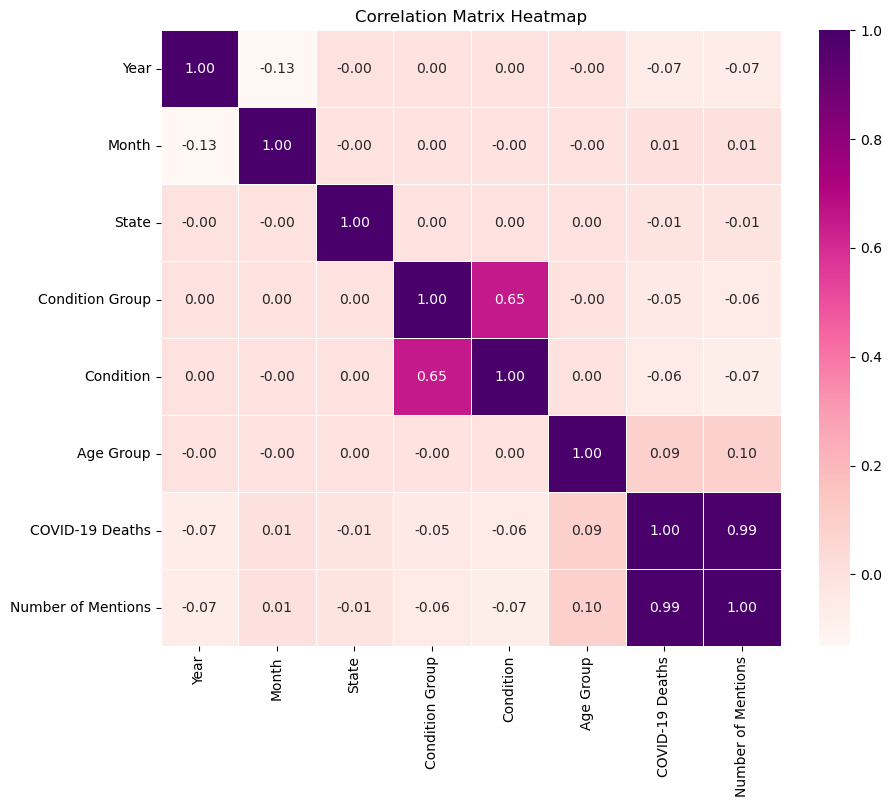

In [49]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
heatmap_corr_matrix = plt.gcf()
plt.show()

In [51]:
# No one will understand scientific numbers. Changing the display setting:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [53]:
# Calculate the corelation matrix
corr_matrix = df_encoded.corr()
print(corr_matrix)

                    Year  Month  State  Condition Group  Condition  Age Group  \
Year                1.00  -0.13  -0.00             0.00       0.00      -0.00   
Month              -0.13   1.00  -0.00             0.00      -0.00      -0.00   
State              -0.00  -0.00   1.00             0.00       0.00       0.00   
Condition Group     0.00   0.00   0.00             1.00       0.65      -0.00   
Condition           0.00  -0.00   0.00             0.65       1.00       0.00   
Age Group          -0.00  -0.00   0.00            -0.00       0.00       1.00   
COVID-19 Deaths    -0.07   0.01  -0.01            -0.05      -0.06       0.09   
Number of Mentions -0.07   0.01  -0.01            -0.06      -0.07       0.10   

                    COVID-19 Deaths  Number of Mentions  
Year                          -0.07               -0.07  
Month                          0.01                0.01  
State                         -0.01               -0.01  
Condition Group               -0.05   

### Top Positive CorrelationsMentions: -0.01


##### COVID-19 Deaths and Number of Mentions: 0.99
##### Condition and Condition Group: 0.65
##### Age Group and Number of Mentions: 0.10
##### Age Group and COVID-19 Deaths: 0.09
##### Month and Number Of Mentions: 0.01
##### Month and COVID-19 Deaths: 0.01

### Top Negative Correlations

##### Year and Month: -0.13
##### Condition and Number of Mention: -0.13
##### Year and Number of Mentions: -0.06
##### Condition and COVID-19 Deaths: -0.06
##### Condition Group and Number of Mentions: -0.05
##### Condition Group and COVID-19 Deaths: -0.05
##### State and COVID-19 Deaths: -0.01
##### State and Number of Mentions: -0.01

### Explore Co-relations with the coonditions column

In [66]:
# Create a list of unique medical conditions from "Condition" column
conditions = df_selected['Condition'].unique()

Correlation Matrix for Influenza and pneumonia:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.12   
Month              -0.13   1.00  -0.00      -0.00             0.02   
State               0.00  -0.00   1.00       0.00            -0.03   
Age Group           0.00  -0.00   0.00       1.00             0.13   
COVID-19 Deaths    -0.12   0.02  -0.03       0.13             1.00   
Number of Mentions -0.12   0.02  -0.03       0.13             1.00   

                    Number of Mentions  
Year                             -0.12  
Month                             0.02  
State                            -0.03  
Age Group                         0.13  
COVID-19 Deaths                   1.00  
Number of Mentions                1.00   



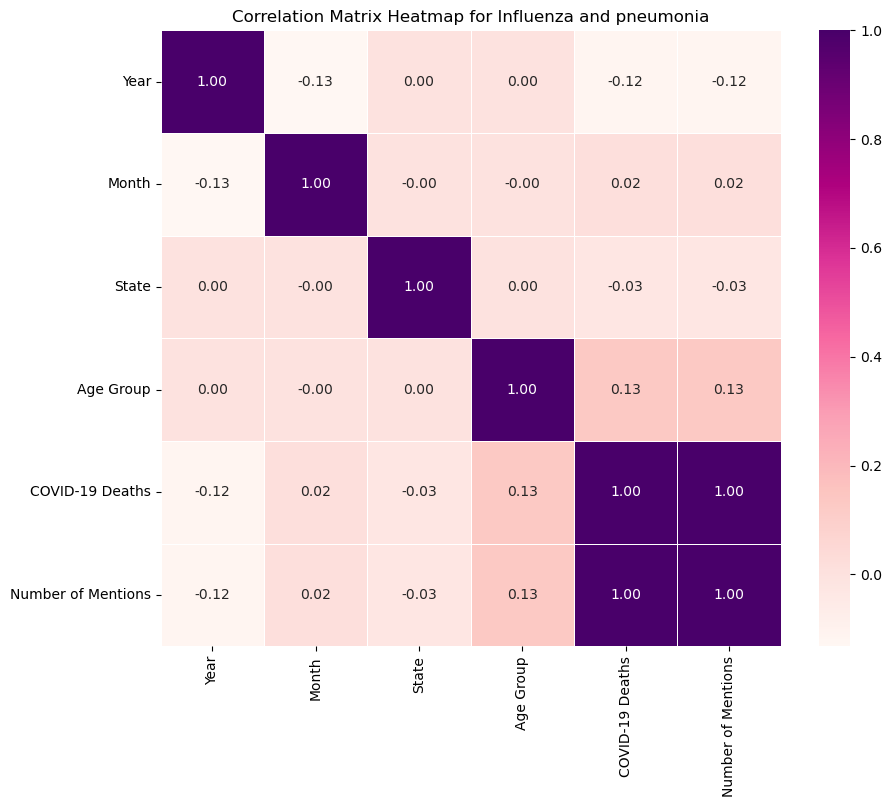

Correlation Matrix for Chronic lower respiratory diseases:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.09   
Month              -0.13   1.00  -0.00      -0.00             0.02   
State               0.00  -0.00   1.00       0.00            -0.02   
Age Group           0.00  -0.00   0.00       1.00             0.20   
COVID-19 Deaths    -0.09   0.02  -0.02       0.20             1.00   
Number of Mentions -0.09   0.02  -0.02       0.20             0.99   

                    Number of Mentions  
Year                             -0.09  
Month                             0.02  
State                            -0.02  
Age Group                         0.20  
COVID-19 Deaths                   0.99  
Number of Mentions                1.00   



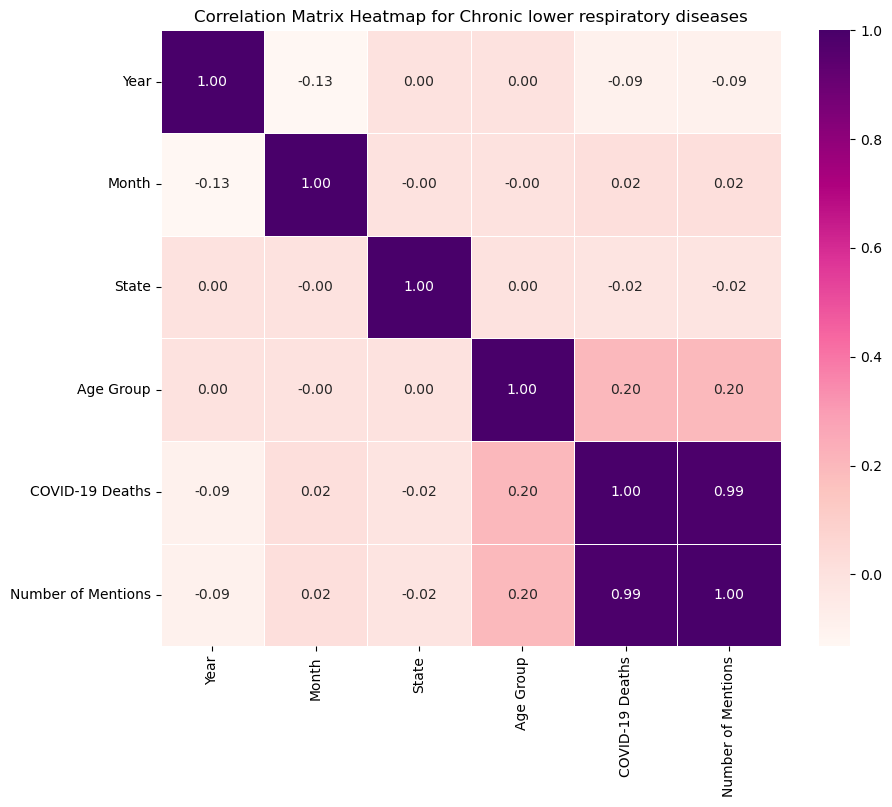

Correlation Matrix for Adult respiratory distress syndrome:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.15   
Month              -0.13   1.00  -0.00      -0.00             0.02   
State               0.00  -0.00   1.00       0.00            -0.02   
Age Group           0.00  -0.00   0.00       1.00             0.08   
COVID-19 Deaths    -0.15   0.02  -0.02       0.08             1.00   
Number of Mentions -0.15   0.02  -0.02       0.08             0.99   

                    Number of Mentions  
Year                             -0.15  
Month                             0.02  
State                            -0.02  
Age Group                         0.08  
COVID-19 Deaths                   0.99  
Number of Mentions                1.00   



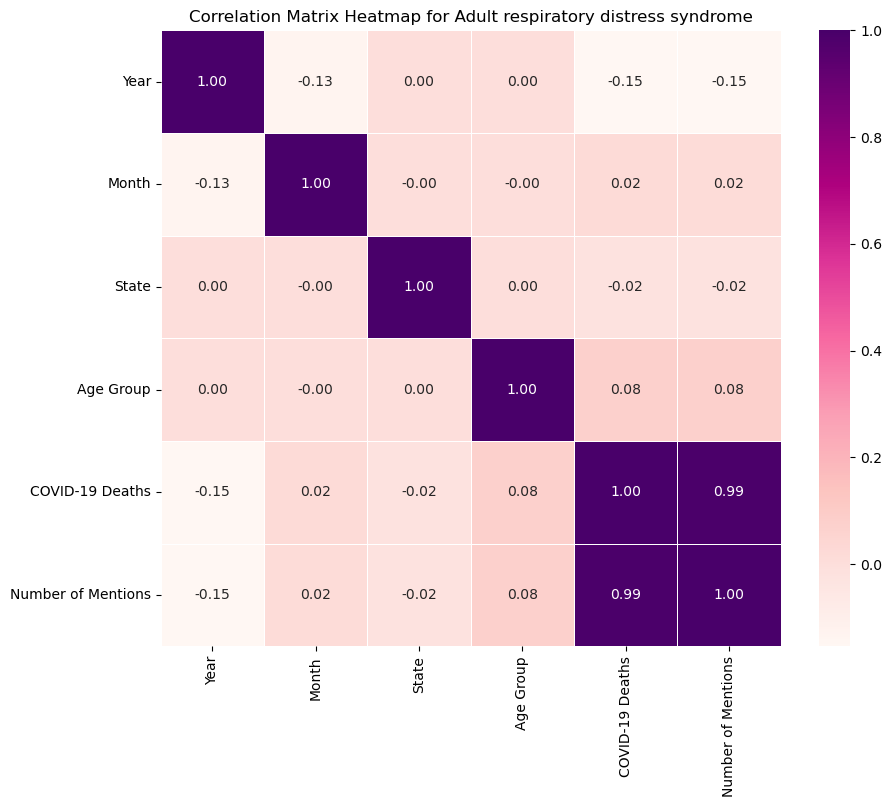

Correlation Matrix for Respiratory failure:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.11   
Month              -0.13   1.00  -0.00      -0.00             0.02   
State               0.00  -0.00   1.00       0.00            -0.04   
Age Group           0.00  -0.00   0.00       1.00             0.14   
COVID-19 Deaths    -0.11   0.02  -0.04       0.14             1.00   
Number of Mentions -0.11   0.01  -0.04       0.14             1.00   

                    Number of Mentions  
Year                             -0.11  
Month                             0.01  
State                            -0.04  
Age Group                         0.14  
COVID-19 Deaths                   1.00  
Number of Mentions                1.00   



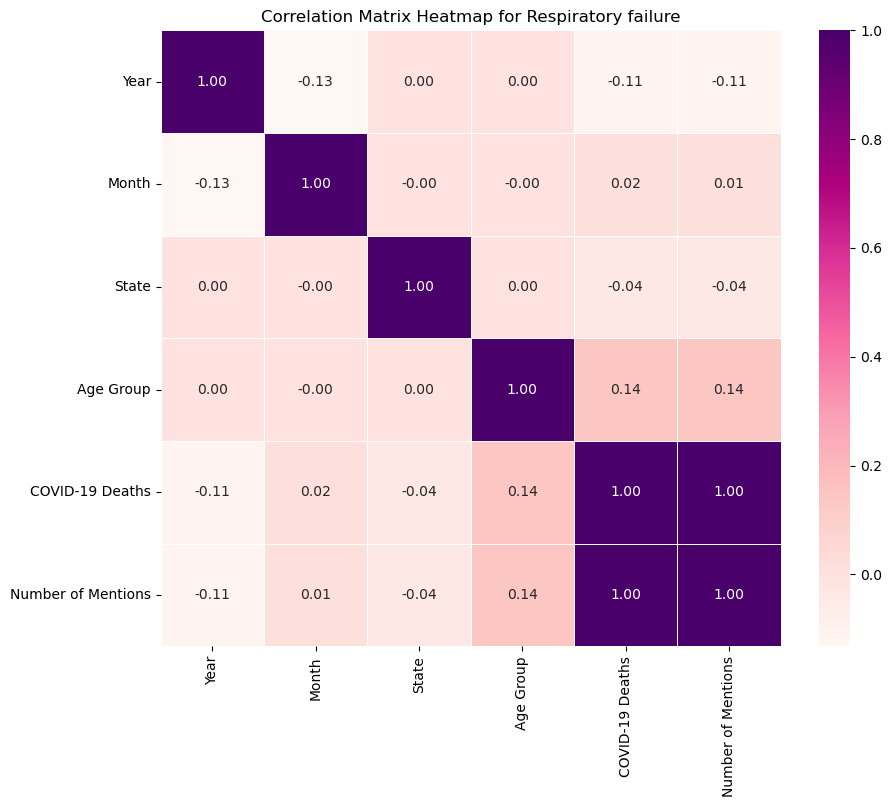

Correlation Matrix for Respiratory arrest:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.09   
Month              -0.13   1.00  -0.00      -0.00             0.03   
State               0.00  -0.00   1.00       0.00            -0.07   
Age Group           0.00  -0.00   0.00       1.00             0.15   
COVID-19 Deaths    -0.09   0.03  -0.07       0.15             1.00   
Number of Mentions -0.09   0.02  -0.07       0.15             0.92   

                    Number of Mentions  
Year                             -0.09  
Month                             0.02  
State                            -0.07  
Age Group                         0.15  
COVID-19 Deaths                   0.92  
Number of Mentions                1.00   



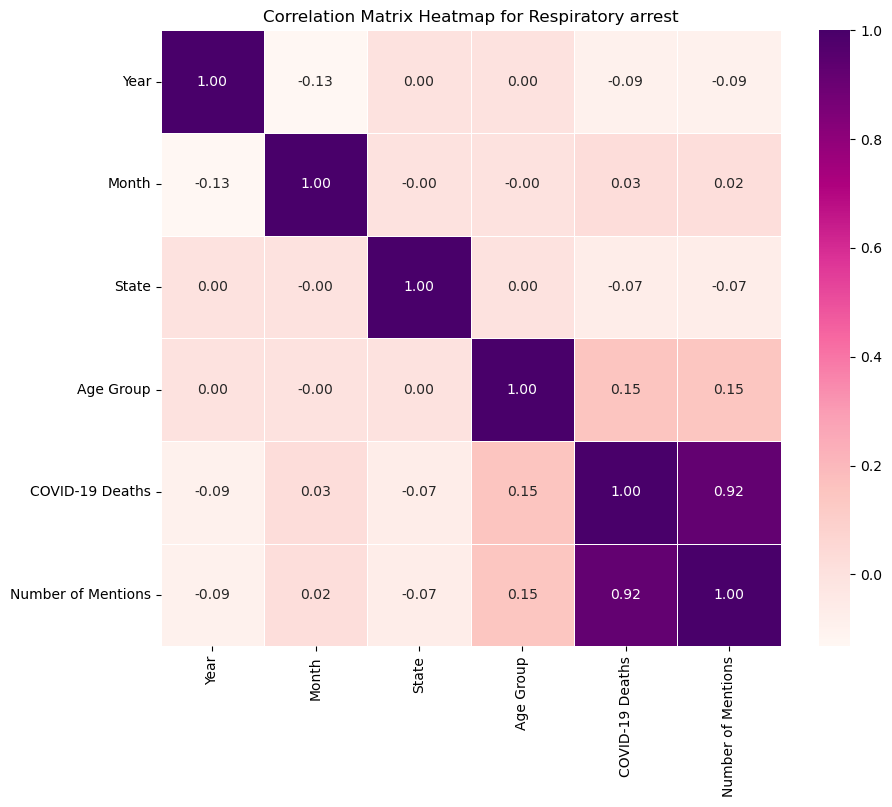

Correlation Matrix for Other diseases of the respiratory system:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.06   
Month              -0.13   1.00  -0.00      -0.00             0.01   
State               0.00  -0.00   1.00       0.00            -0.02   
Age Group           0.00  -0.00   0.00       1.00             0.17   
COVID-19 Deaths    -0.06   0.01  -0.02       0.17             1.00   
Number of Mentions -0.06   0.01  -0.02       0.16             0.96   

                    Number of Mentions  
Year                             -0.06  
Month                             0.01  
State                            -0.02  
Age Group                         0.16  
COVID-19 Deaths                   0.96  
Number of Mentions                1.00   



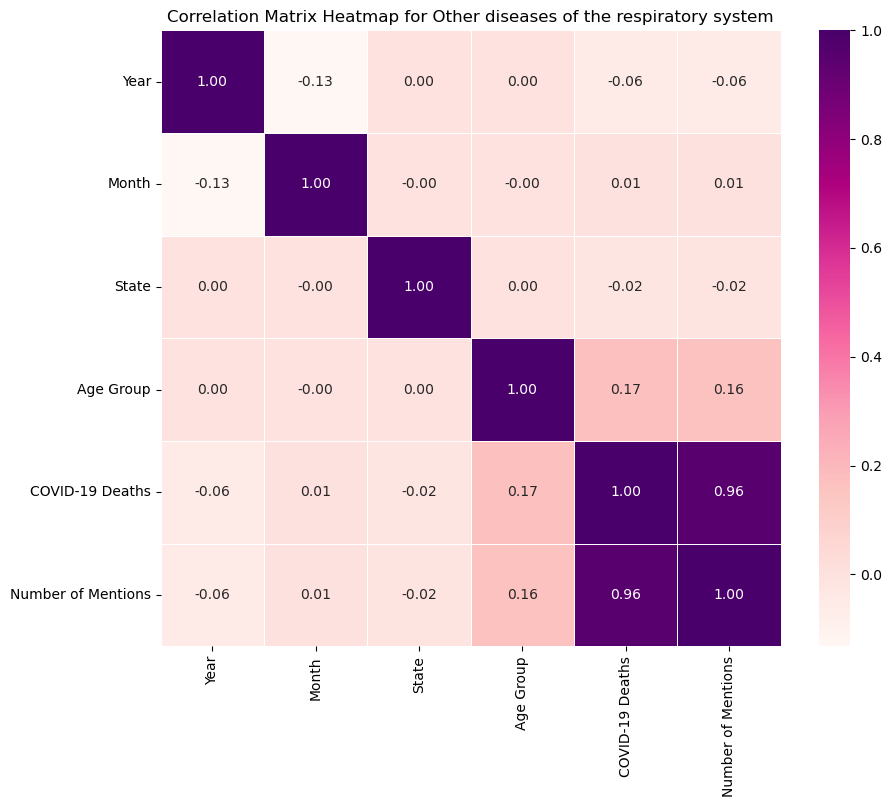

Correlation Matrix for Hypertensive diseases:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.11   
Month              -0.13   1.00  -0.00      -0.00             0.01   
State               0.00  -0.00   1.00       0.00            -0.02   
Age Group           0.00  -0.00   0.00       1.00             0.16   
COVID-19 Deaths    -0.11   0.01  -0.02       0.16             1.00   
Number of Mentions -0.11   0.01  -0.02       0.16             1.00   

                    Number of Mentions  
Year                             -0.11  
Month                             0.01  
State                            -0.02  
Age Group                         0.16  
COVID-19 Deaths                   1.00  
Number of Mentions                1.00   



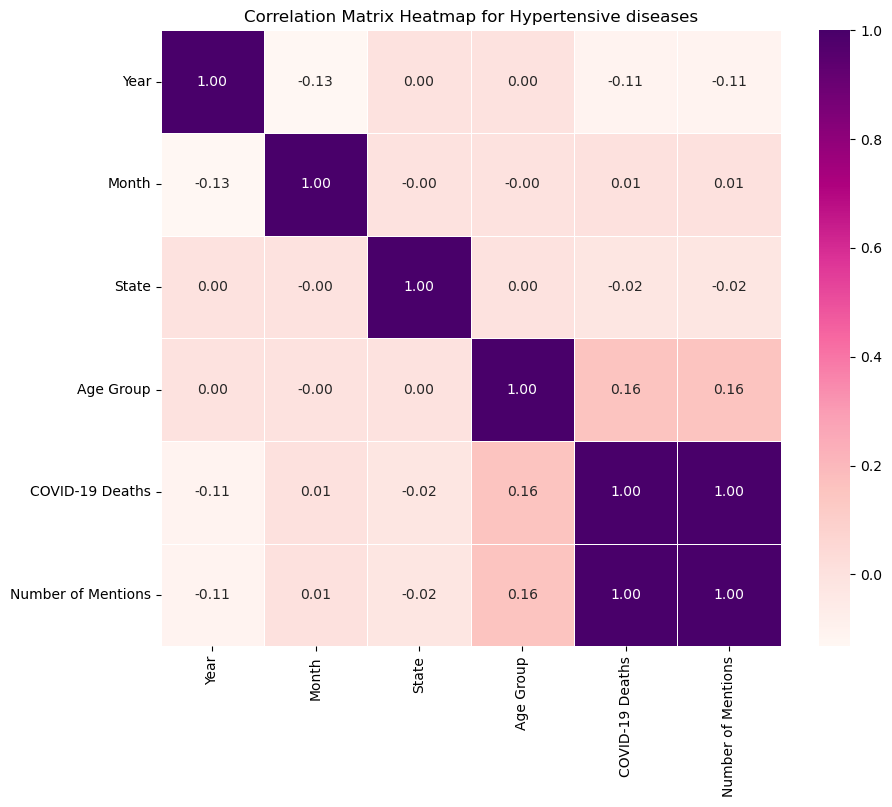

Correlation Matrix for Ischemic heart disease:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.09   
Month              -0.13   1.00  -0.00      -0.00             0.01   
State               0.00  -0.00   1.00       0.00            -0.01   
Age Group           0.00  -0.00   0.00       1.00             0.19   
COVID-19 Deaths    -0.09   0.01  -0.01       0.19             1.00   
Number of Mentions -0.09   0.01  -0.01       0.19             0.99   

                    Number of Mentions  
Year                             -0.09  
Month                             0.01  
State                            -0.01  
Age Group                         0.19  
COVID-19 Deaths                   0.99  
Number of Mentions                1.00   



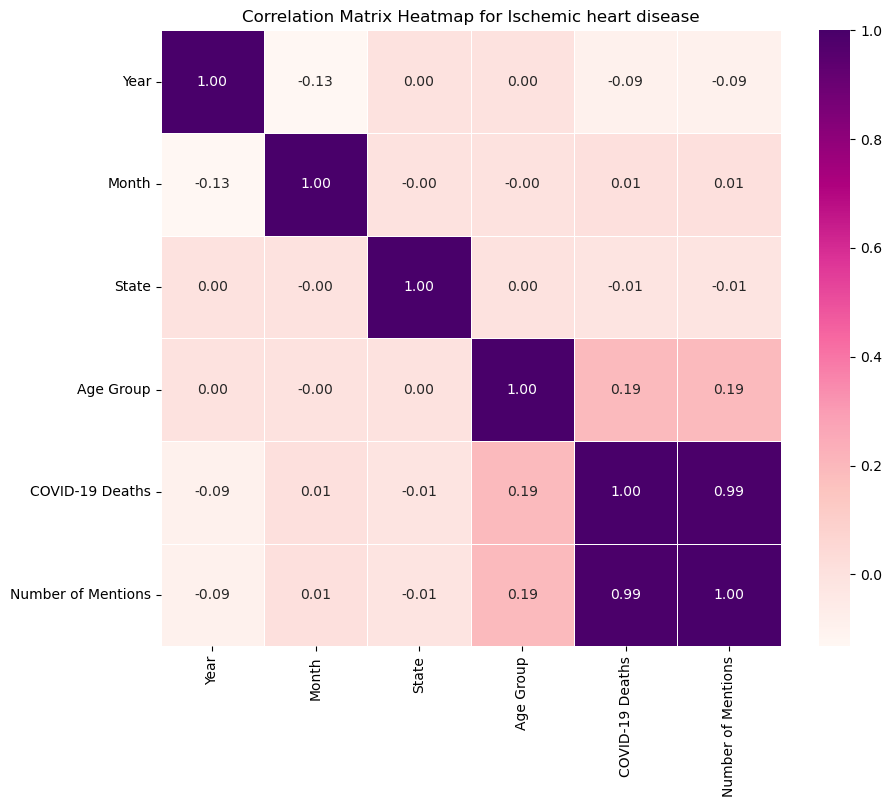

Correlation Matrix for Cardiac arrest:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.07   
Month              -0.13   1.00  -0.00      -0.00            -0.01   
State               0.00  -0.00   1.00       0.00            -0.06   
Age Group           0.00  -0.00   0.00       1.00             0.09   
COVID-19 Deaths    -0.07  -0.01  -0.06       0.09             1.00   
Number of Mentions -0.07  -0.01  -0.06       0.09             1.00   

                    Number of Mentions  
Year                             -0.07  
Month                            -0.01  
State                            -0.06  
Age Group                         0.09  
COVID-19 Deaths                   1.00  
Number of Mentions                1.00   



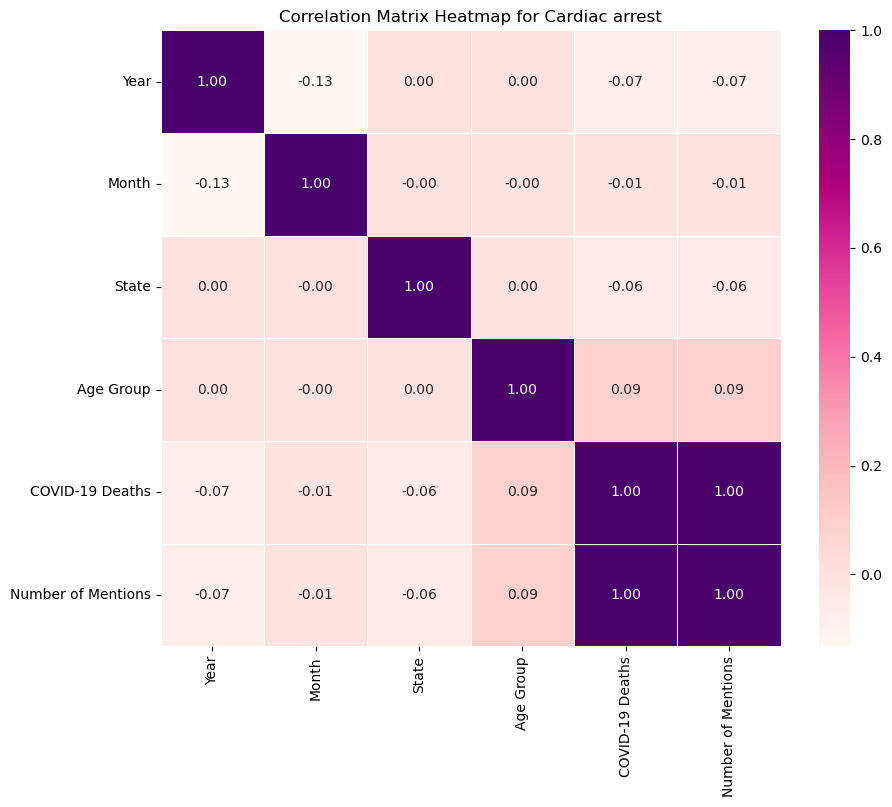

Correlation Matrix for Cardiac arrhythmia:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.08   
Month              -0.13   1.00  -0.00      -0.00             0.01   
State               0.00  -0.00   1.00       0.00            -0.01   
Age Group           0.00  -0.00   0.00       1.00             0.21   
COVID-19 Deaths    -0.08   0.01  -0.01       0.21             1.00   
Number of Mentions -0.08   0.01  -0.01       0.21             0.99   

                    Number of Mentions  
Year                             -0.08  
Month                             0.01  
State                            -0.01  
Age Group                         0.21  
COVID-19 Deaths                   0.99  
Number of Mentions                1.00   



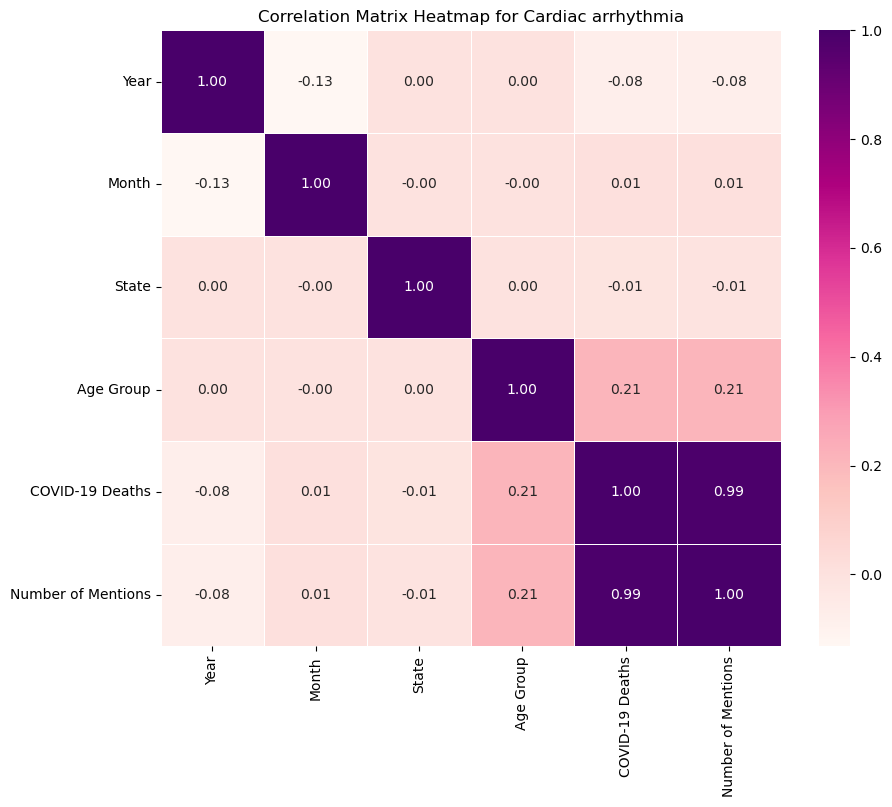

Correlation Matrix for Heart failure:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.07   
Month              -0.13   1.00  -0.00      -0.00             0.01   
State               0.00  -0.00   1.00       0.00            -0.01   
Age Group           0.00  -0.00   0.00       1.00             0.23   
COVID-19 Deaths    -0.07   0.01  -0.01       0.23             1.00   
Number of Mentions -0.07   0.01  -0.01       0.23             0.99   

                    Number of Mentions  
Year                             -0.07  
Month                             0.01  
State                            -0.01  
Age Group                         0.23  
COVID-19 Deaths                   0.99  
Number of Mentions                1.00   



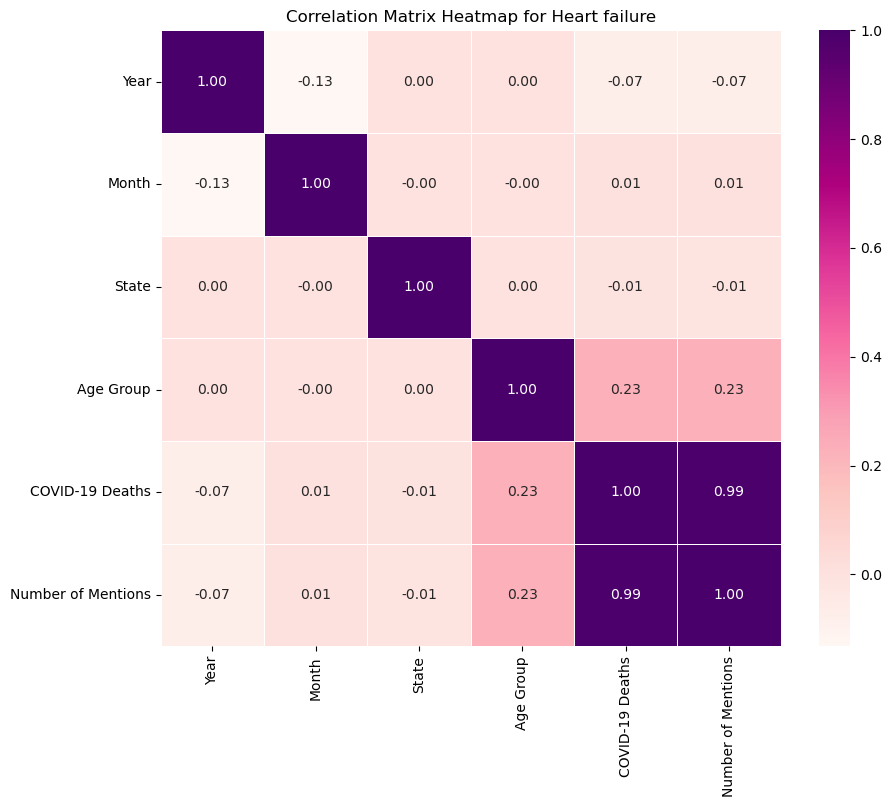

Correlation Matrix for Cerebrovascular diseases:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.08   
Month              -0.13   1.00  -0.00      -0.00             0.00   
State               0.00  -0.00   1.00       0.00            -0.02   
Age Group           0.00  -0.00   0.00       1.00             0.20   
COVID-19 Deaths    -0.08   0.00  -0.02       0.20             1.00   
Number of Mentions -0.08   0.01  -0.02       0.20             0.97   

                    Number of Mentions  
Year                             -0.08  
Month                             0.01  
State                            -0.02  
Age Group                         0.20  
COVID-19 Deaths                   0.97  
Number of Mentions                1.00   



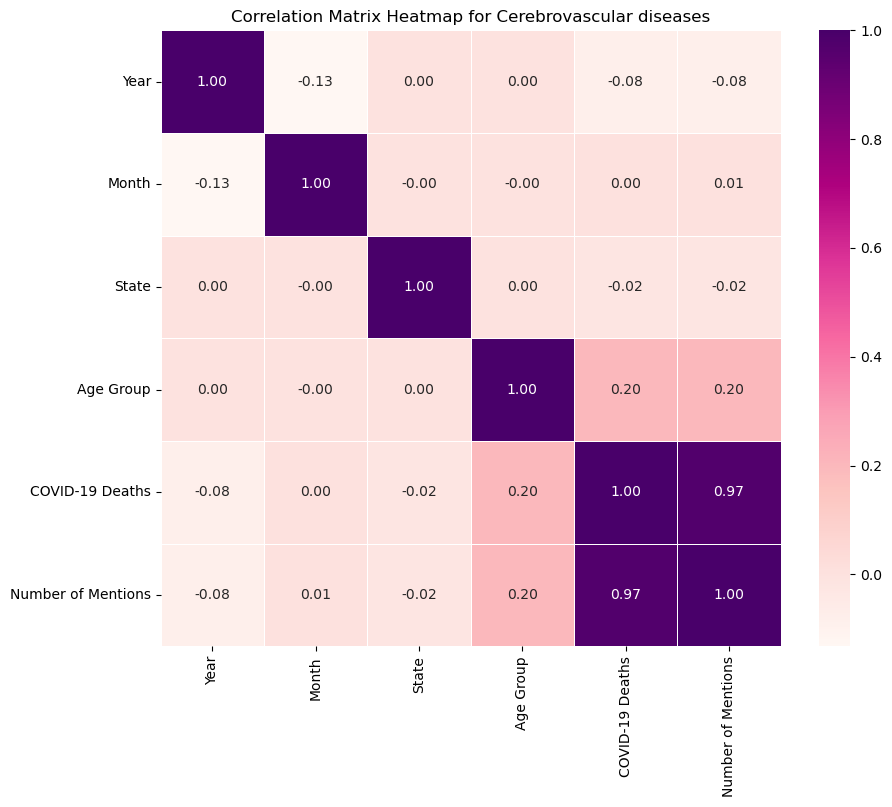

Correlation Matrix for Other diseases of the circulatory system:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.07   
Month              -0.13   1.00  -0.00      -0.00             0.01   
State               0.00  -0.00   1.00       0.00            -0.01   
Age Group           0.00  -0.00   0.00       1.00             0.17   
COVID-19 Deaths    -0.07   0.01  -0.01       0.17             1.00   
Number of Mentions -0.07   0.01  -0.01       0.17             0.98   

                    Number of Mentions  
Year                             -0.07  
Month                             0.01  
State                            -0.01  
Age Group                         0.17  
COVID-19 Deaths                   0.98  
Number of Mentions                1.00   



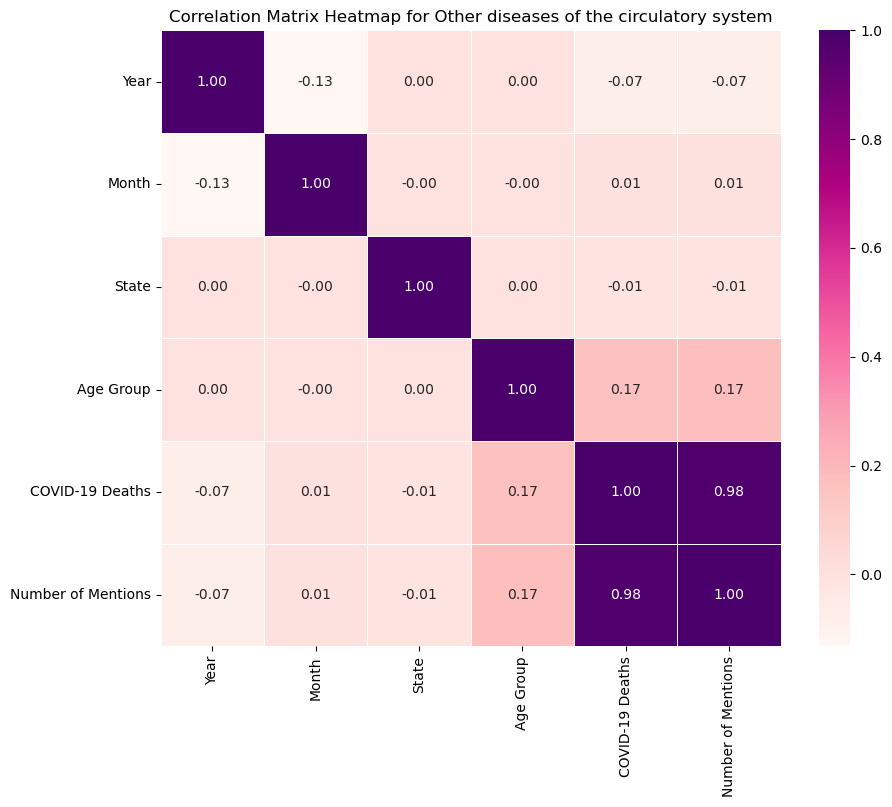

Correlation Matrix for Sepsis:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.10   
Month              -0.13   1.00  -0.00      -0.00             0.01   
State               0.00  -0.00   1.00       0.00            -0.03   
Age Group           0.00  -0.00   0.00       1.00             0.11   
COVID-19 Deaths    -0.10   0.01  -0.03       0.11             1.00   
Number of Mentions -0.10   0.01  -0.03       0.11             0.99   

                    Number of Mentions  
Year                             -0.10  
Month                             0.01  
State                            -0.03  
Age Group                         0.11  
COVID-19 Deaths                   0.99  
Number of Mentions                1.00   



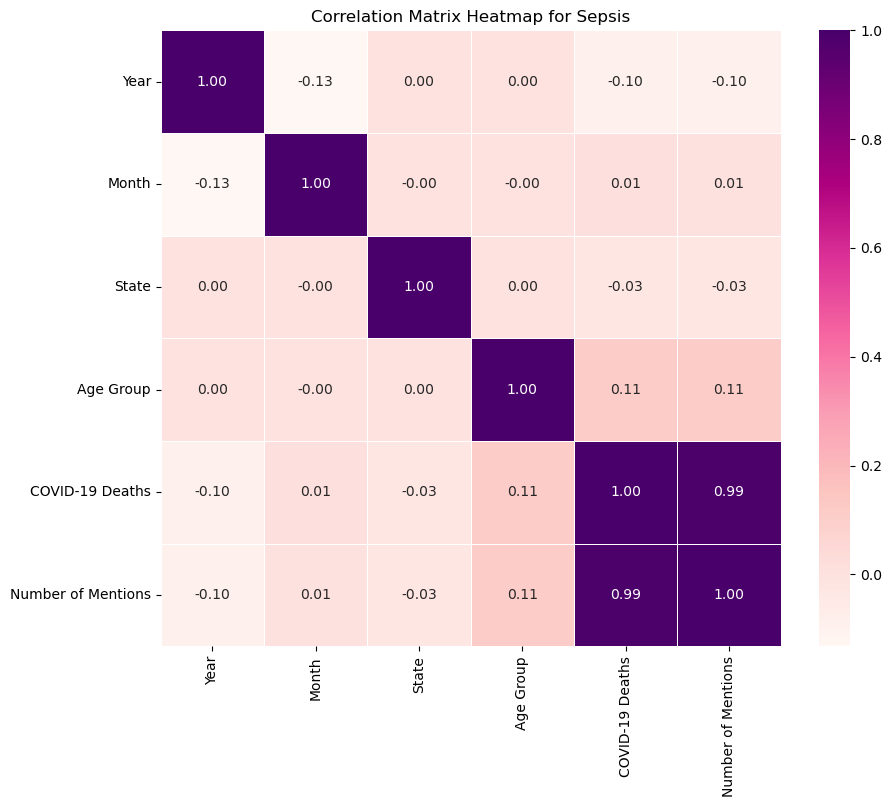

Correlation Matrix for Malignant neoplasms:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.03   
Month              -0.13   1.00  -0.00      -0.00            -0.01   
State               0.00  -0.00   1.00       0.00            -0.02   
Age Group           0.00  -0.00   0.00       1.00             0.20   
COVID-19 Deaths    -0.03  -0.01  -0.02       0.20             1.00   
Number of Mentions -0.03  -0.01  -0.02       0.20             0.97   

                    Number of Mentions  
Year                             -0.03  
Month                            -0.01  
State                            -0.02  
Age Group                         0.20  
COVID-19 Deaths                   0.97  
Number of Mentions                1.00   



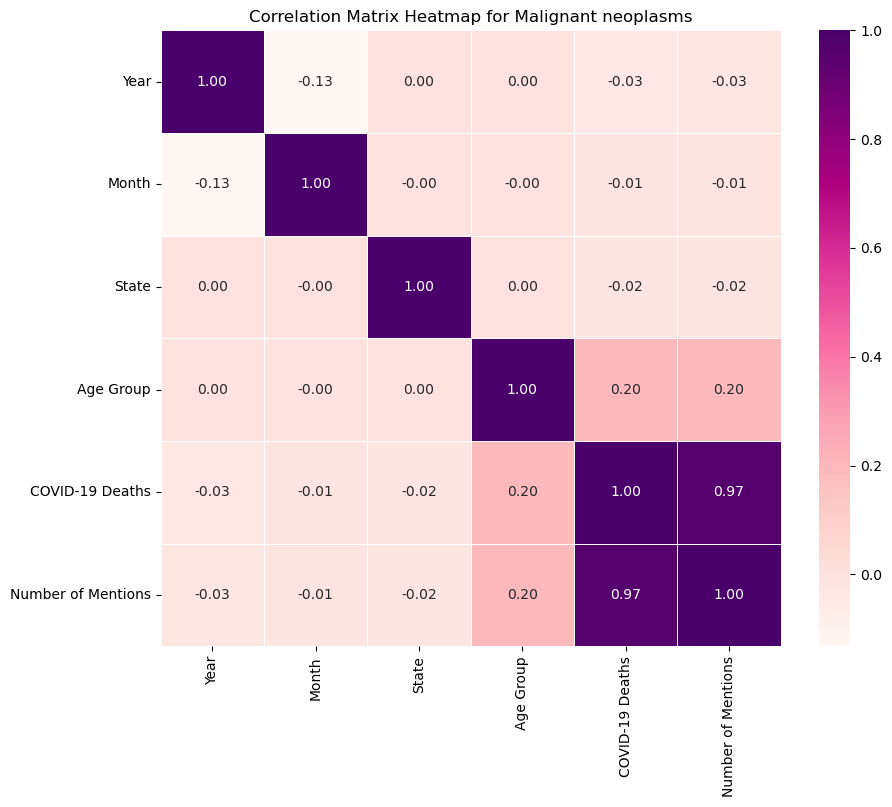

Correlation Matrix for Diabetes:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.12   
Month              -0.13   1.00  -0.00      -0.00             0.01   
State               0.00  -0.00   1.00       0.00            -0.03   
Age Group           0.00  -0.00   0.00       1.00             0.12   
COVID-19 Deaths    -0.12   0.01  -0.03       0.12             1.00   
Number of Mentions -0.12   0.01  -0.03       0.12             1.00   

                    Number of Mentions  
Year                             -0.12  
Month                             0.01  
State                            -0.03  
Age Group                         0.12  
COVID-19 Deaths                   1.00  
Number of Mentions                1.00   



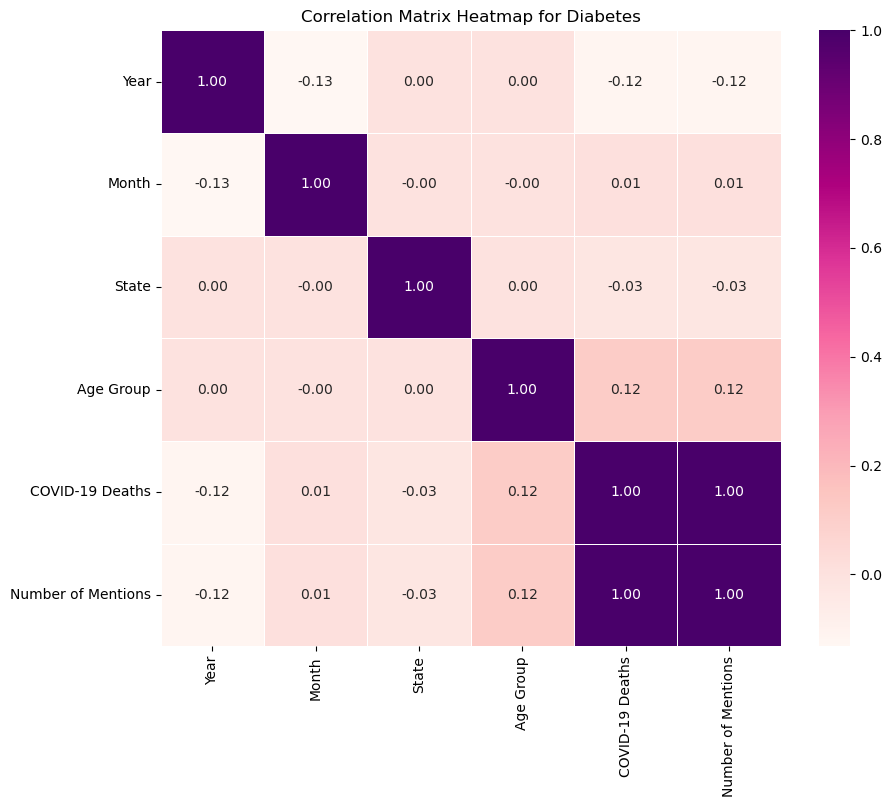

Correlation Matrix for Obesity:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.12   
Month              -0.13   1.00  -0.00      -0.00             0.05   
State               0.00  -0.00   1.00       0.00            -0.01   
Age Group           0.00  -0.00   0.00       1.00            -0.01   
COVID-19 Deaths    -0.12   0.05  -0.01      -0.01             1.00   
Number of Mentions -0.12   0.05  -0.01      -0.01             0.97   

                    Number of Mentions  
Year                             -0.12  
Month                             0.05  
State                            -0.01  
Age Group                        -0.01  
COVID-19 Deaths                   0.97  
Number of Mentions                1.00   



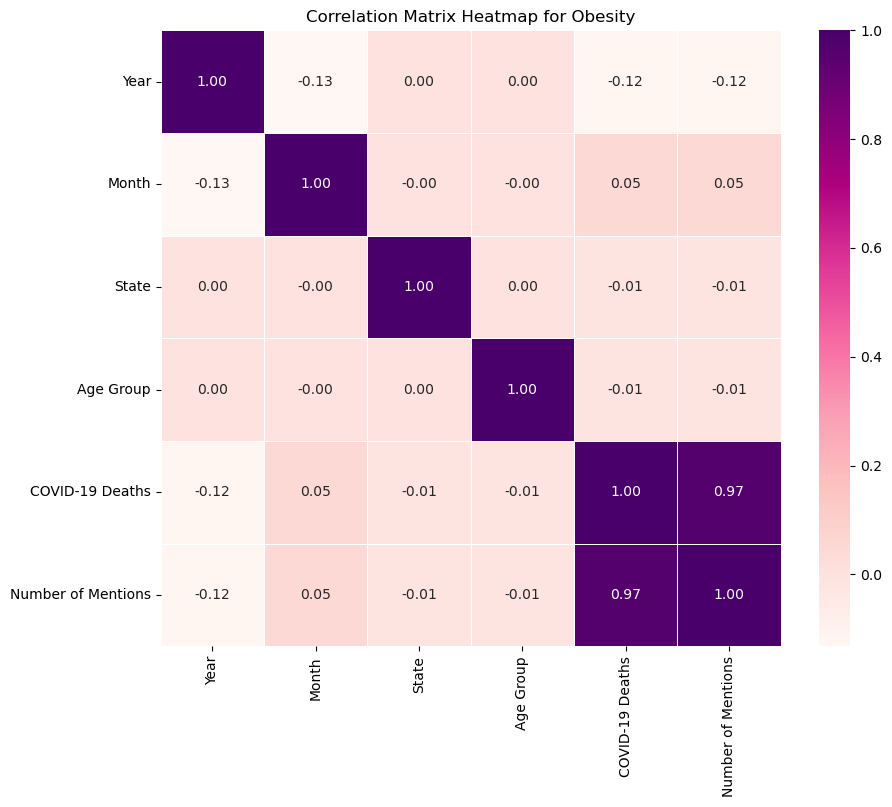

Correlation Matrix for Alzheimer disease:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.08   
Month              -0.13   1.00  -0.00      -0.00             0.02   
State               0.00  -0.00   1.00       0.00            -0.01   
Age Group           0.00  -0.00   0.00       1.00             0.21   
COVID-19 Deaths    -0.08   0.02  -0.01       0.21             1.00   
Number of Mentions -0.08   0.02  -0.01       0.20             0.98   

                    Number of Mentions  
Year                             -0.08  
Month                             0.02  
State                            -0.01  
Age Group                         0.20  
COVID-19 Deaths                   0.98  
Number of Mentions                1.00   



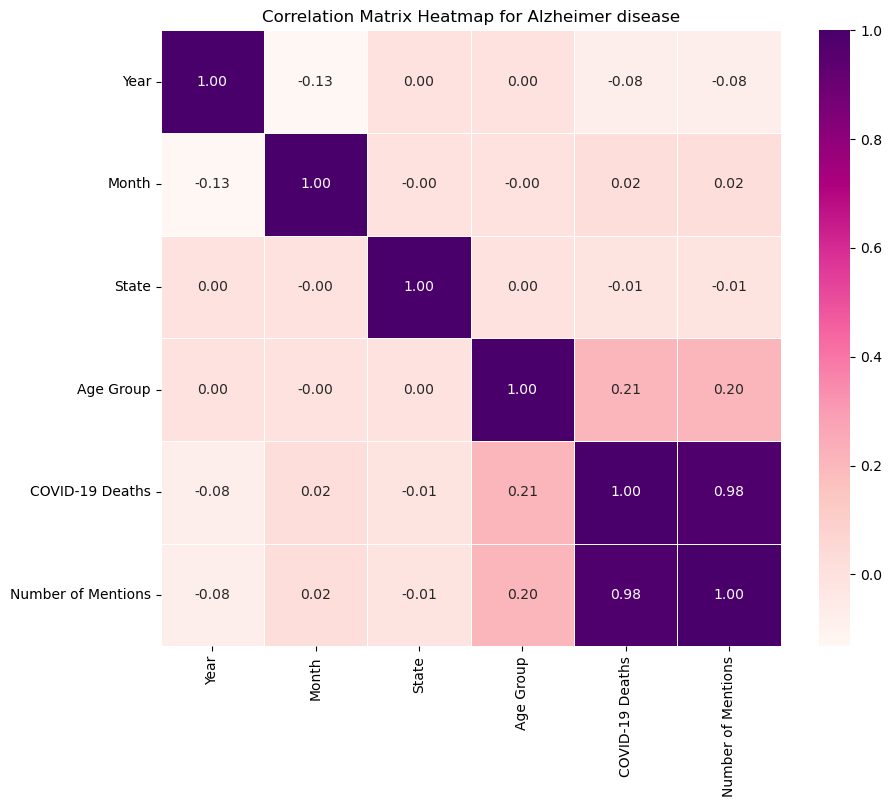

Correlation Matrix for Vascular and unspecified dementia:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.10   
Month              -0.13   1.00  -0.00      -0.00             0.01   
State               0.00  -0.00   1.00       0.00            -0.01   
Age Group           0.00  -0.00   0.00       1.00             0.21   
COVID-19 Deaths    -0.10   0.01  -0.01       0.21             1.00   
Number of Mentions -0.10   0.01  -0.01       0.21             1.00   

                    Number of Mentions  
Year                             -0.10  
Month                             0.01  
State                            -0.01  
Age Group                         0.21  
COVID-19 Deaths                   1.00  
Number of Mentions                1.00   



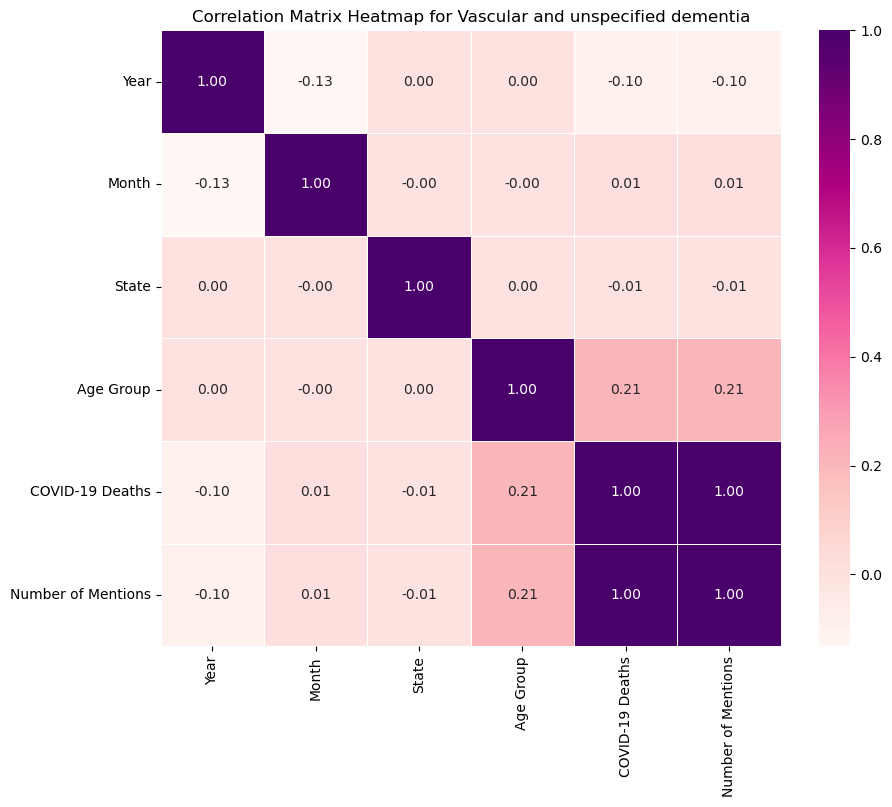

Correlation Matrix for Renal failure:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.09   
Month              -0.13   1.00  -0.00      -0.00            -0.00   
State               0.00  -0.00   1.00       0.00            -0.01   
Age Group           0.00  -0.00   0.00       1.00             0.14   
COVID-19 Deaths    -0.09  -0.00  -0.01       0.14             1.00   
Number of Mentions -0.09  -0.00  -0.01       0.14             0.99   

                    Number of Mentions  
Year                             -0.09  
Month                            -0.00  
State                            -0.01  
Age Group                         0.14  
COVID-19 Deaths                   0.99  
Number of Mentions                1.00   



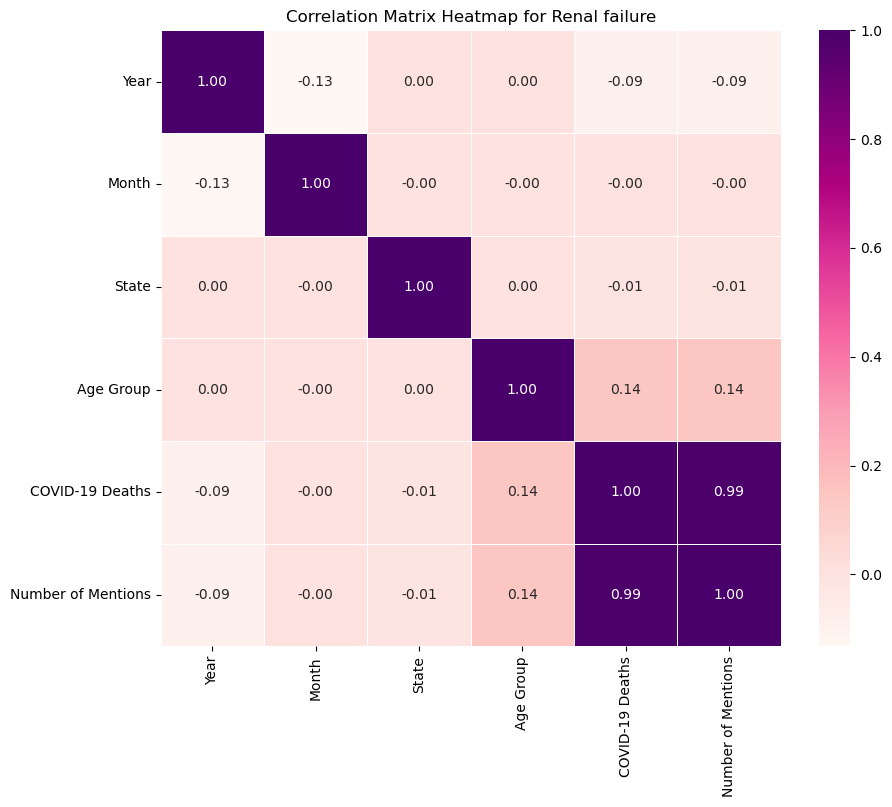

Correlation Matrix for Intentional and unintentional injury, poisoning, and other adverse events:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.04   
Month              -0.13   1.00  -0.00      -0.00            -0.01   
State               0.00  -0.00   1.00       0.00            -0.02   
Age Group           0.00  -0.00   0.00       1.00             0.14   
COVID-19 Deaths    -0.04  -0.01  -0.02       0.14             1.00   
Number of Mentions -0.05  -0.01  -0.02       0.15             0.86   

                    Number of Mentions  
Year                             -0.05  
Month                            -0.01  
State                            -0.02  
Age Group                         0.15  
COVID-19 Deaths                   0.86  
Number of Mentions                1.00   



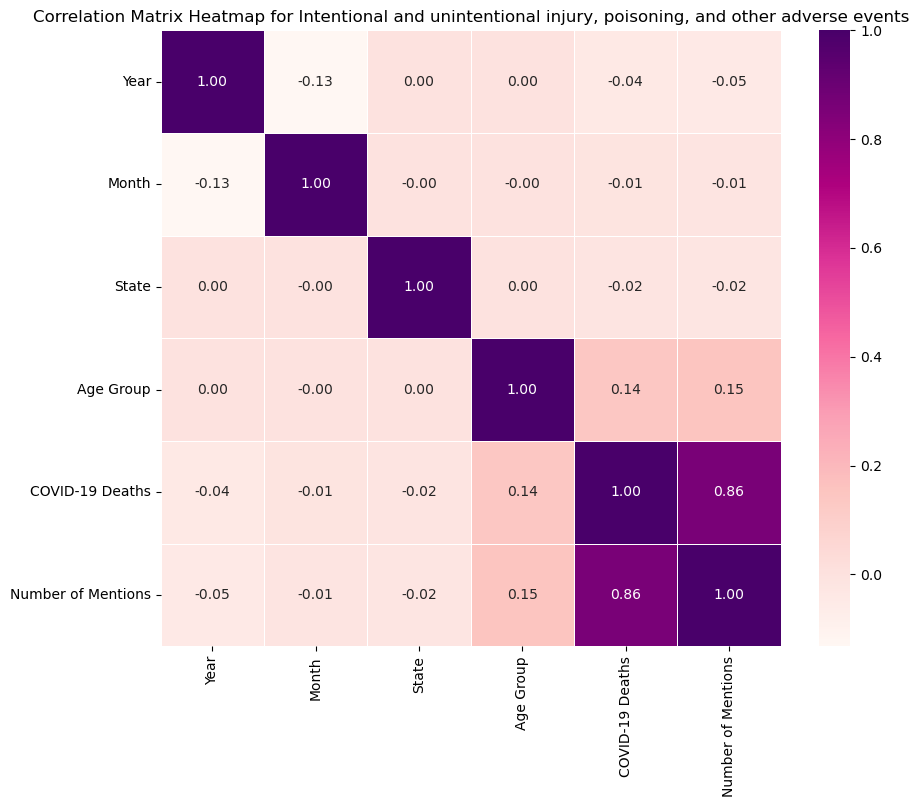

Correlation Matrix for All other conditions and causes (residual):
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.11   
Month              -0.13   1.00  -0.00      -0.00             0.02   
State               0.00  -0.00   1.00       0.00            -0.01   
Age Group           0.00  -0.00   0.00       1.00             0.18   
COVID-19 Deaths    -0.11   0.02  -0.01       0.18             1.00   
Number of Mentions -0.10   0.01   0.00       0.19             1.00   

                    Number of Mentions  
Year                             -0.10  
Month                             0.01  
State                             0.00  
Age Group                         0.19  
COVID-19 Deaths                   1.00  
Number of Mentions                1.00   



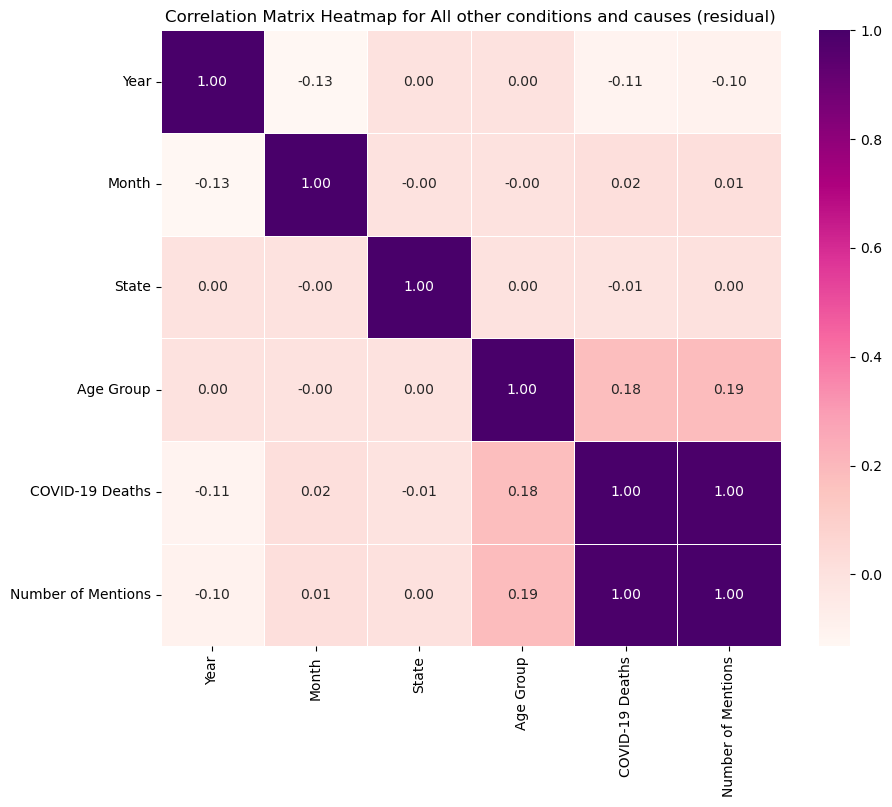

Correlation Matrix for COVID-19:
                     Year  Month  State  Age Group  COVID-19 Deaths  \
Year                1.00  -0.13   0.00       0.00            -0.12   
Month              -0.13   1.00  -0.00      -0.00             0.01   
State               0.00  -0.00   1.00       0.00            -0.02   
Age Group           0.00  -0.00   0.00       1.00             0.16   
COVID-19 Deaths    -0.12   0.01  -0.02       0.16             1.00   
Number of Mentions -0.12   0.01  -0.02       0.16             1.00   

                    Number of Mentions  
Year                             -0.12  
Month                             0.01  
State                            -0.02  
Age Group                         0.16  
COVID-19 Deaths                   1.00  
Number of Mentions                1.00   



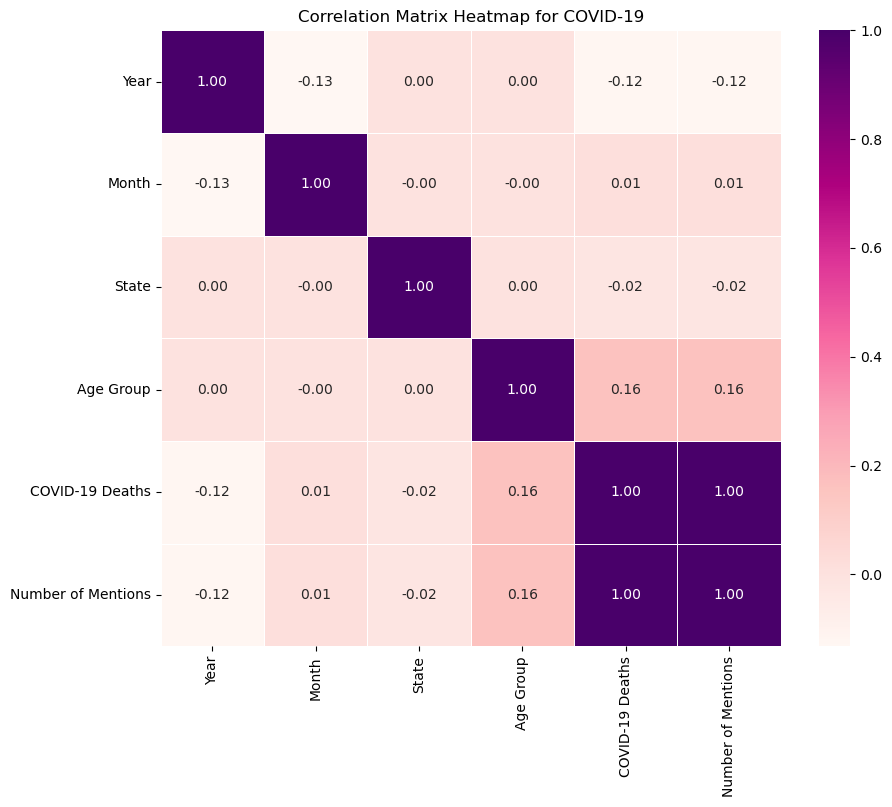

In [70]:
# Use a "for loop" to calculated the correlations for each condition and create heetmap
for condition in conditions:
    df_condition = df_selected[df_selected['Condition'] == condition]
    df_condition_encoded = df_encoded[df_selected['Condition'] == condition]
    if df_condition_encoded.shape[0] > 1:
        numeric_df = df_condition_encoded.select_dtypes(include=[np.number])
        numeric_df = numeric_df.loc[:, numeric_df.var() != 0.0]
        corr_matrix = numeric_df.corr()
        
        # Print correlation matrix for each condition
        print(f'Correlation Matrix for {condition}:\n', corr_matrix, '\n')
        
        # Plot heetmap for each condition
        plt.figure(figsize=(10,8))
        sns.heatmap(corr_matrix, annot=True, cmap='RdPu', fmt='.2f', linewidths=0.5)
        plt.title(f'Correlation Matrix Heatmap for {condition}')
        heatmap_condition = plt.gcf()
        plt.show()
        
        # Export the heatmaps
        heatmap_condition.savefig(os.path.join(path, '04 Analysis', 'Visualizations', f'heatmap_corr_matrix_{condition.replace(" ", "_").lower()}.png'))

Top 10 strongest positive correlations for specific conditions:
Influenza and Pneumonia
COVID-19 Deaths and Number of Mentions: 0.999627

Cardiac arrest
COVID-19 Deaths and Number of Mentions: 0.997826

Diabets
COVID-19 Deaths and Number of Mentions: 0.997581

Vascular and unspecified dementia
COVID-19 Deaths and Number of Mentions: 0.997092

Ischemic heart disease
COVID-19 Deaths and Number of Mentions: 0.994934

Renal failure
COVID-19 Deaths and Number of Mentions: 0.994445

Adult respiratory distress syndrome
COVID-19 Deaths and Number of Mentions: 0.993687

Cardiac arrhythmia
COVID-19 Deaths and Number of Mentions: 0.991258

Heart failure
COVID-19 Deaths and Number of Mentions: 0.990584

Cerebrovascular diseases
COVID-19 Deaths and Number of Mentions: 0.974335

Strongest negative correlations to specific conditions:
Adult respiratory distress syndrome
COVID-19 Deaths and Year: -0.164269

Number of Mentions and Year: -0.165661

Obesity
COVID-19 Deaths and Year: -0.131945

Number of Mentions and Year: -0.130110

COVID-19
COVID-19 Deaths and Year: -0.129267

Number of Mentions and Year: -0.129189

Diabetes
COVID-19 Deaths and Year: -0.124636

Number of Mentions and Year: -0.124306

Influenza and pneumonia
COVID-19 Deaths and Year: -0.123822

Number of Mentions and Year: -0.123505

Rental failure
COVID-19 Deaths and Year: -0.091558

Number of Mentions and Year: -0.091551

Cerebrovascular diseses
COVID-19 Deaths and Year: -0.086577

Number of Mentions and Year: -0.087495

Alzheimer disease
COVID-19 Deaths and Year: -0.083869

Number of Mentions and Year: -0.082754

Cardiac arrhythmia
COVID-19 Deaths and Year: -0.081916

Number of Mentions and Year: -0.081245

Other diesses of the circulatory system
COVID-19 Deaths and Year: -0.061105

Number of Mentions and Year: -0.081245

Insights into the Correlation of the Column Variables
A very strong positive corretion between COVID-19 and Number of Mentions (0.99) represents the higher mentions of COVID-19 related condition correspond closely to increases death ratio. The moderate positive correlation between Condition and Condition Group (0.65).

Insights into the Correlations of Specific Medical Conditions in the "Condition" Variable.
Specific medical conditions have very strong correlation with COVID-19 Deaths and Number of Mentions. Conditions like influenza and pnemonia, vascular ans unspecified dementia, and diabetes show higher corrleation of 0.99. Moderate positive correlation between with for conditions like ischemic heart disease (0.30) and cerebrovascular diseases (0.34). Weak negative correlation with year for some conditions a slight decrease.

## Scatter Plot

#### Create Scatterplot with strongest correlations among the columns.

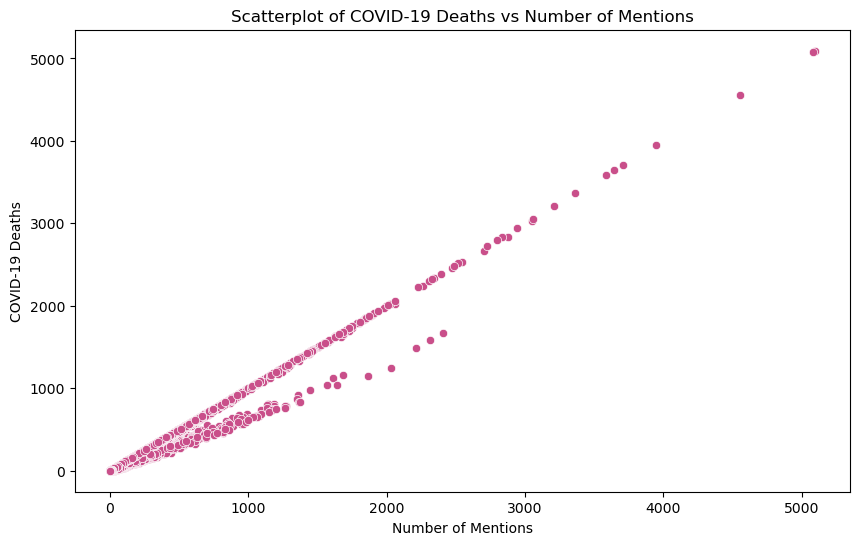

In [75]:
# Scatterplot for COVID-19 Deaths and Number of Mentions
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_selected, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title('Scatterplot of COVID-19 Deaths vs Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_mentions_deaths = plt.gcf()
plt.show()

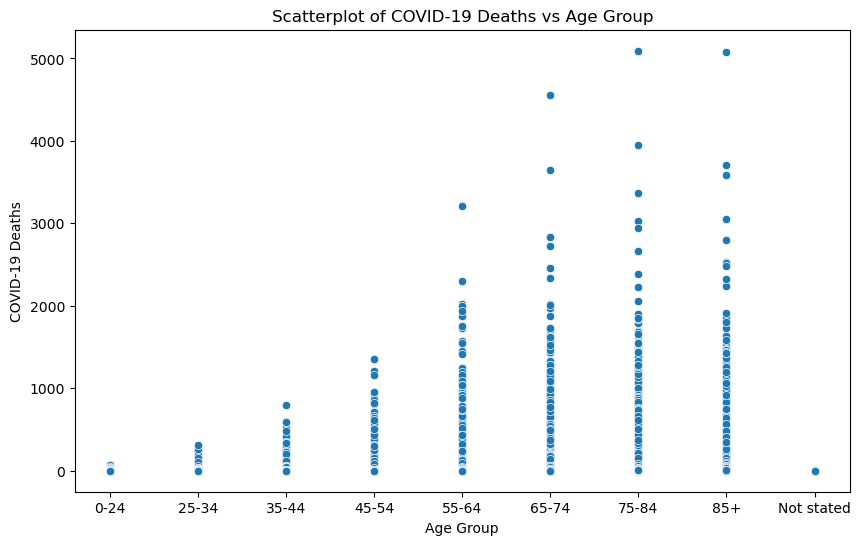

In [77]:
# Scatterplot for Age Group and COVID-19 Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Age Group', y='COVID-19 Deaths')
plt.title('Scatterplot of COVID-19 Deaths vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
scatterplot_agegroup_deaths = plt.gcf()
plt.show()

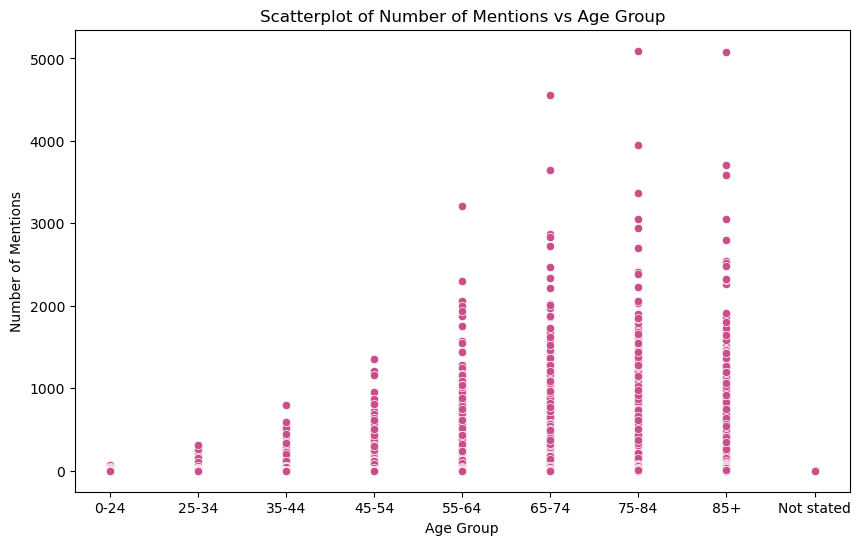

In [79]:
# Scatterplot for Age Group and Number of Mentions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Age Group', y='Number of Mentions', color = '#c94f8a')
plt.title('Scatterplot of Number of Mentions vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Mentions')
scatterplot_mentions_agegroup = plt.gcf()
plt.show()

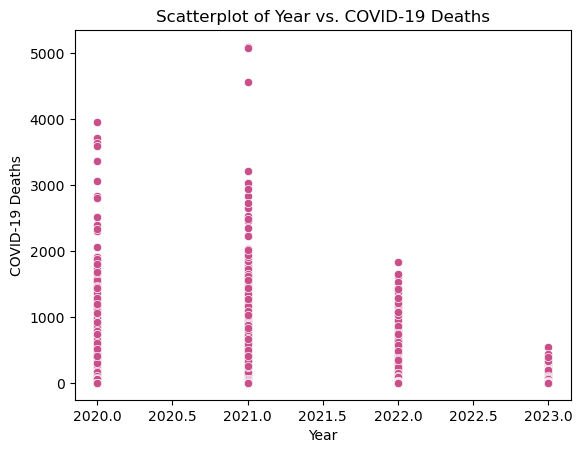

In [81]:
# Scatterplot for Year and COVID-19 Deaths
sns.scatterplot(data=df_selected, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title('Scatterplot of Year vs. COVID-19 Deaths')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_year_deaths = plt.gcf()
plt.show()

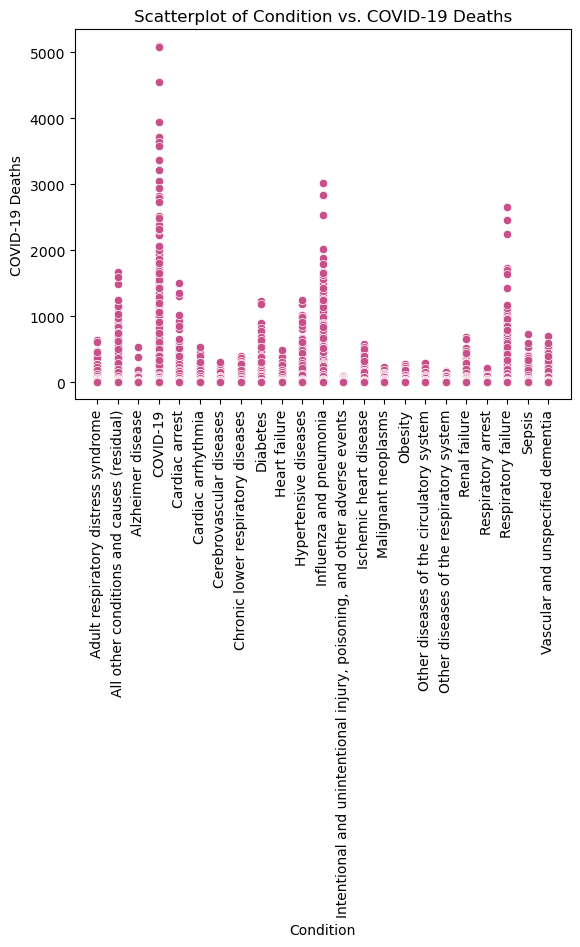

In [83]:
# Scatterplot for Condtion and COVID-19 Deaths
sns.scatterplot(data=df_selected, x='Condition', y='COVID-19 Deaths', color = '#c94f8a')
plt.title('Scatterplot of Condition vs. COVID-19 Deaths')
plt.xlabel('Condition')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=90)
scatterplot_condition_deaths = plt.gcf()
plt.show()

### Create Scatterplots for top 5 positive correlations for specificmedical conditions

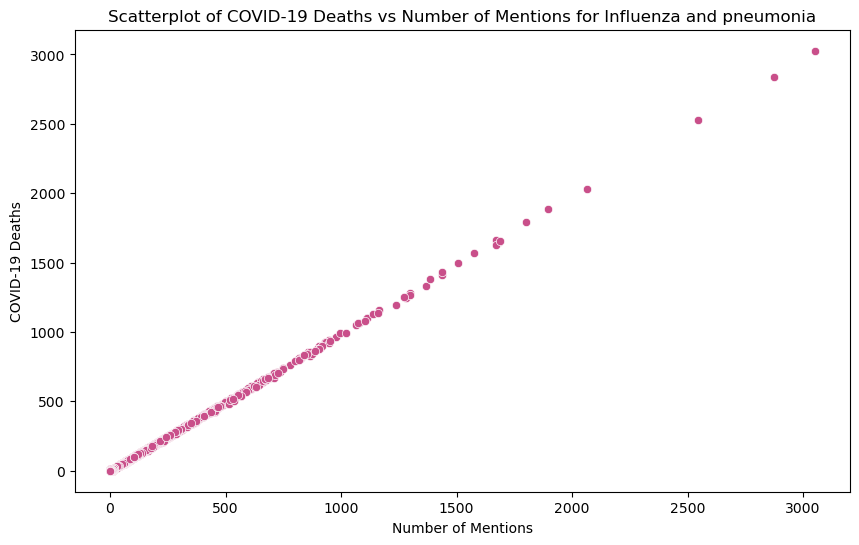

In [86]:
# Scatterplot for Influenza and pneumonia
condition = 'Influenza and pneumonia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_influenza_pneumonia = plt.gcf()
plt.show()

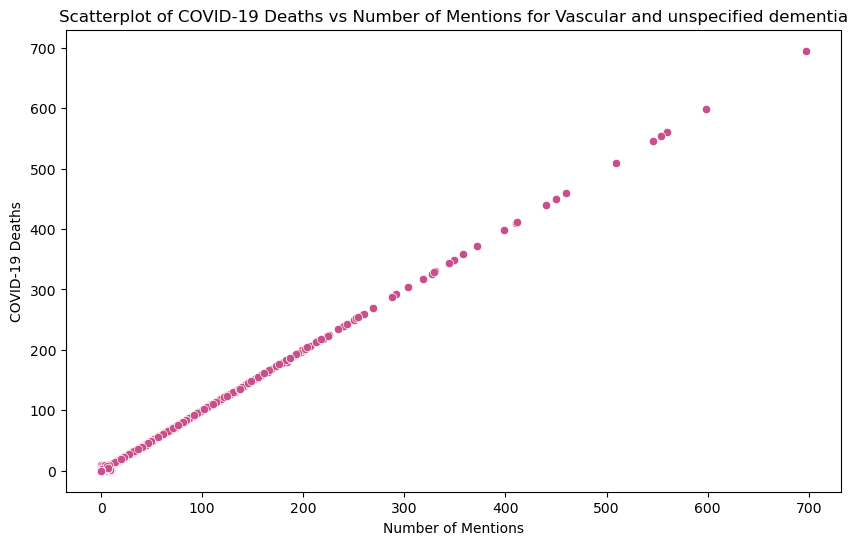

In [88]:
# Scatterplot for Vascular and unspecified dementia
condition = 'Vascular and unspecified dementia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_vascular_dementia = plt.gcf()
plt.show()

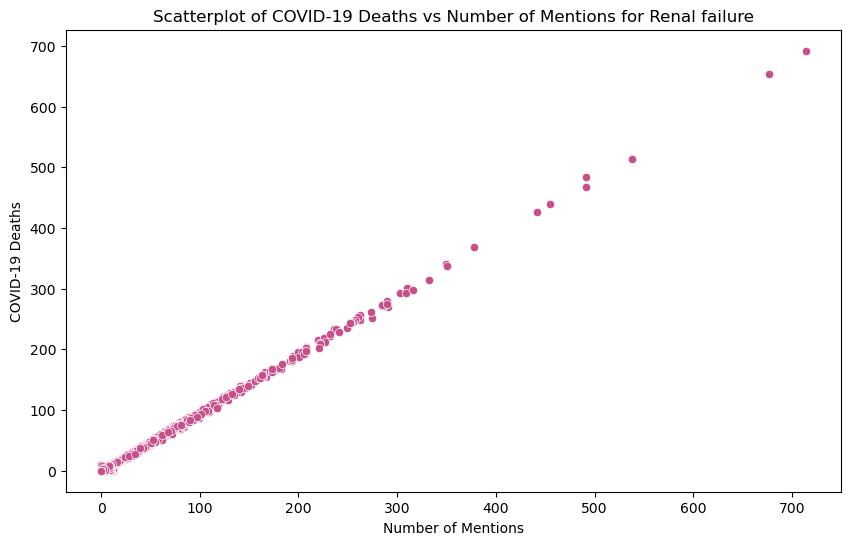

In [90]:
# Scatterplot for Renal failure
condition = 'Renal failure'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_renal_failure = plt.gcf()
plt.show()

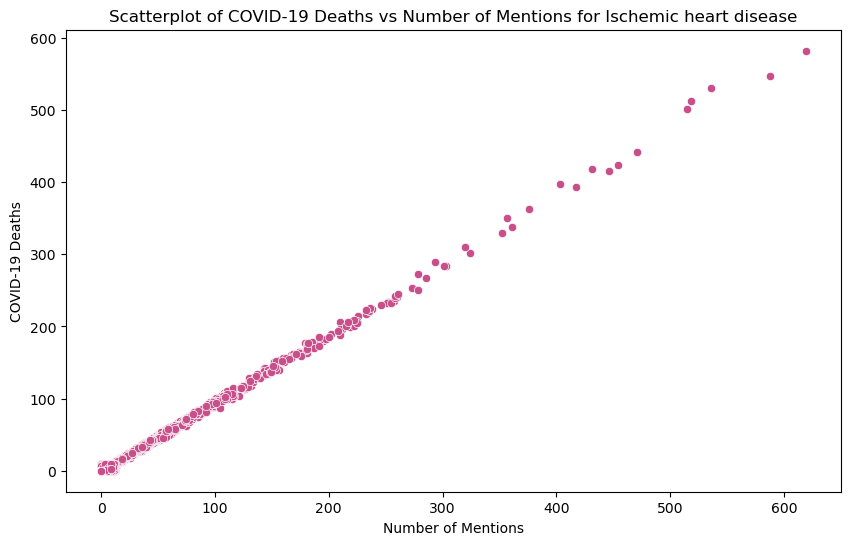

In [92]:
# Scatterplot for Ischemic heart disease
condition = 'Ischemic heart disease'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_ischemic_heart_disease = plt.gcf()
plt.show()

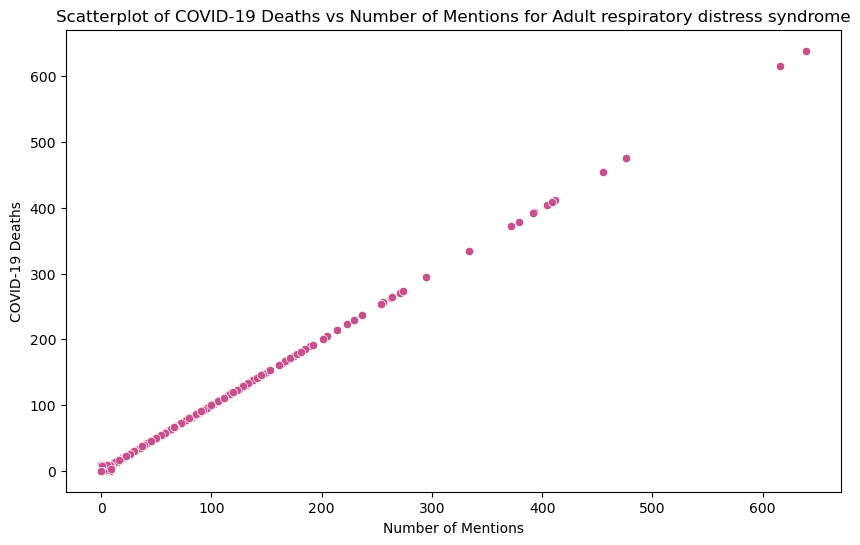

In [94]:

# Scatterplot for Adult respiratory distress syndrome
condition = 'Adult respiratory distress syndrome'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_respiratory_distress = plt.gcf()
plt.show()

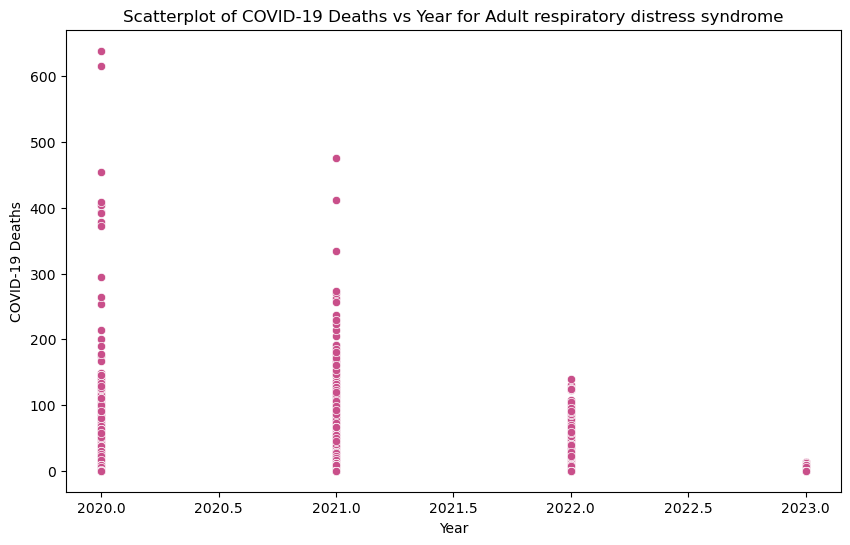

In [96]:
# Scatterplot for Adult respiratory distress syndrome - COVID-19 Deaths and Year
condition = 'Adult respiratory distress syndrome'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_respiratory_distress_year = plt.gcf()
plt.show()

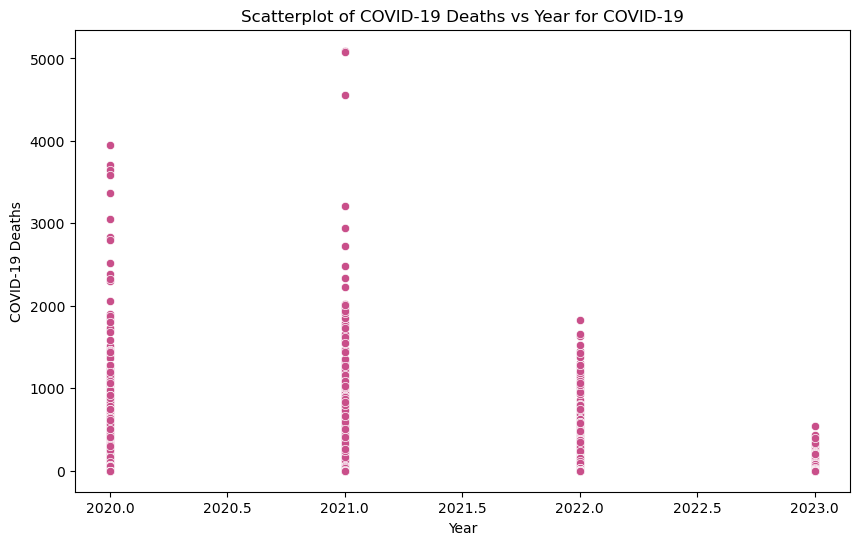

In [98]:
# Scatterplot for  COVID-19 Deaths and Year
condition = 'COVID-19'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_covid19_year = plt.gcf()
plt.show()

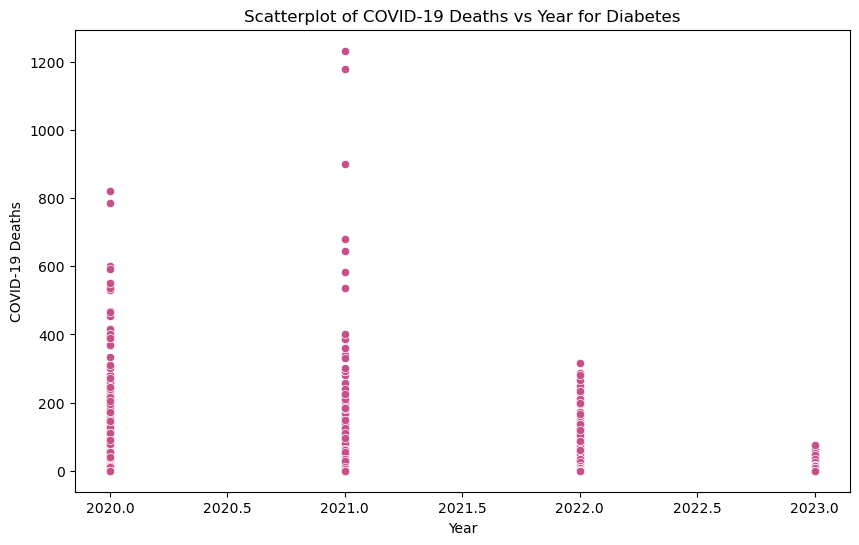

In [100]:
# Scatterplot for Diabetes - COVID-19 Deaths and Year
condition = 'Diabetes'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_diabetes_year = plt.gcf()
plt.show()

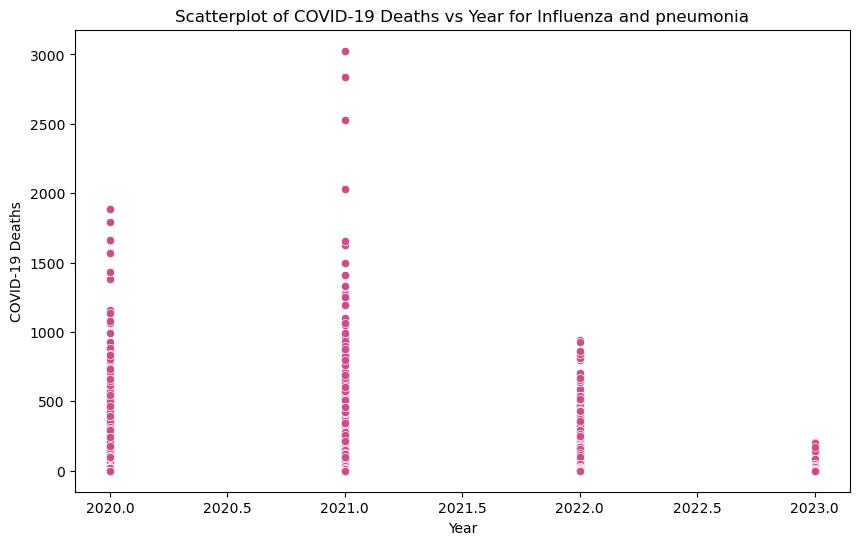

In [102]:
# Scatterplot for Influenza and pneumonia - COVID-19 Deaths and Year
condition = 'Influenza and pneumonia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_influenza_year = plt.gcf()
plt.show()

### Insights from the Scatterplot Analysis
The scatterplot of COVID-19 Deaths vs. Number of Mentions represents postive strong correlation. Age Group vs. COVID-19 Deaths and Age Grop vs. Number of Mentions represent outcomes. it's clearly reprents older age group have a highr deaths counts mentions and older age group highly affected by COVID-19. The scatterplot of Year vs. COVOD-19 Deaths reprents variability over time.

The Scatterplot of COVID-19 Deaths vs. Number of mentions for conditions like influenza and pneumonia, vascular ans unspecified dementia, ans ischemic heart disease have strong positive relation and it's represents highest COVID-19 Deaths counts. COVID-19 Deaths vs. Year for conditions represents weak negative relation and suggests slight deacrese death over time. COVID-19 vs. Age Group for conditions like cardiac arreset and renal failure scatterplot represents older age group have higher death counts.

### Create a Pair Plot

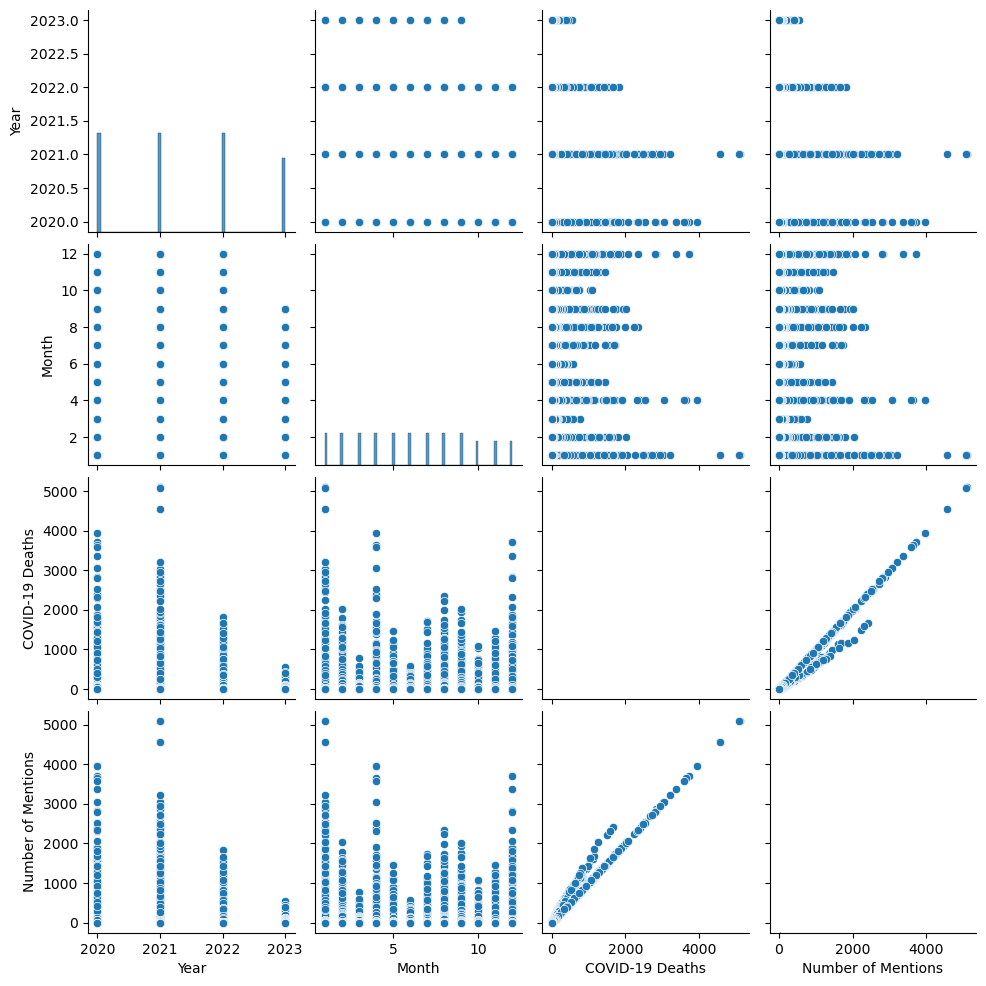

In [111]:
# Create a Pair Plot of the entire dataset
sns.pairplot(df)
pair_plot_entire_dataset = plt.gcf()
plt.show()

### Create pair plots for specific medical conditions from the "Condition" column.

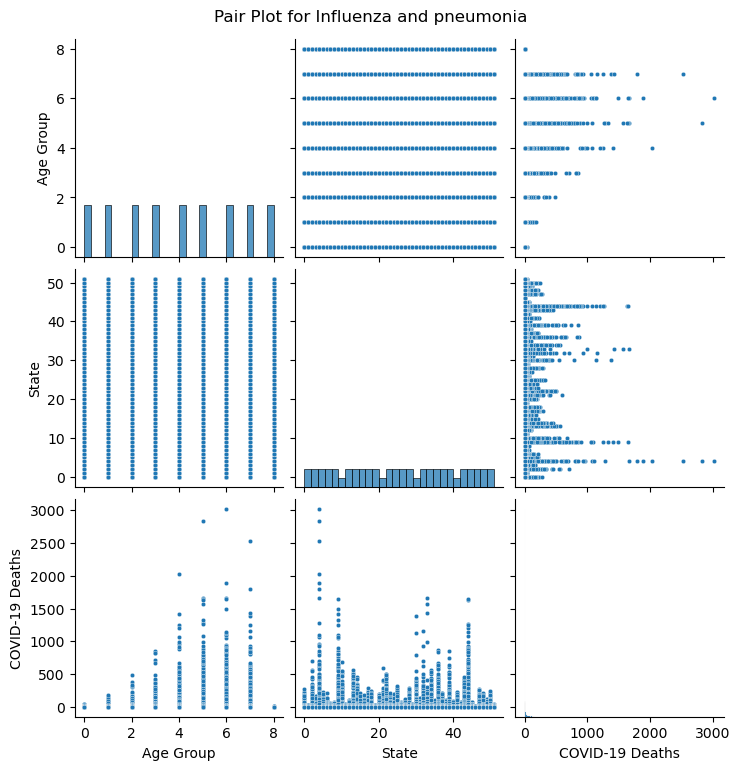

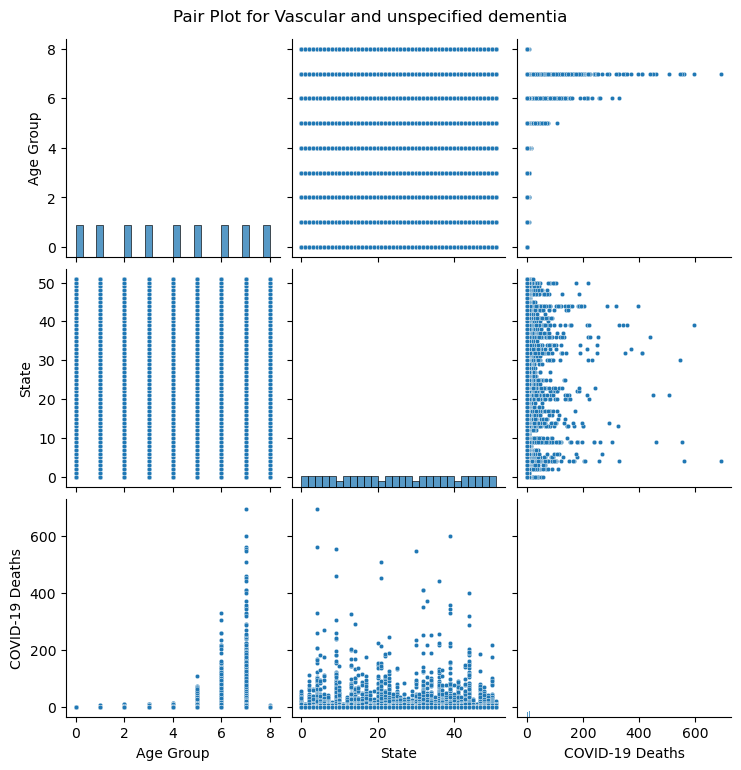

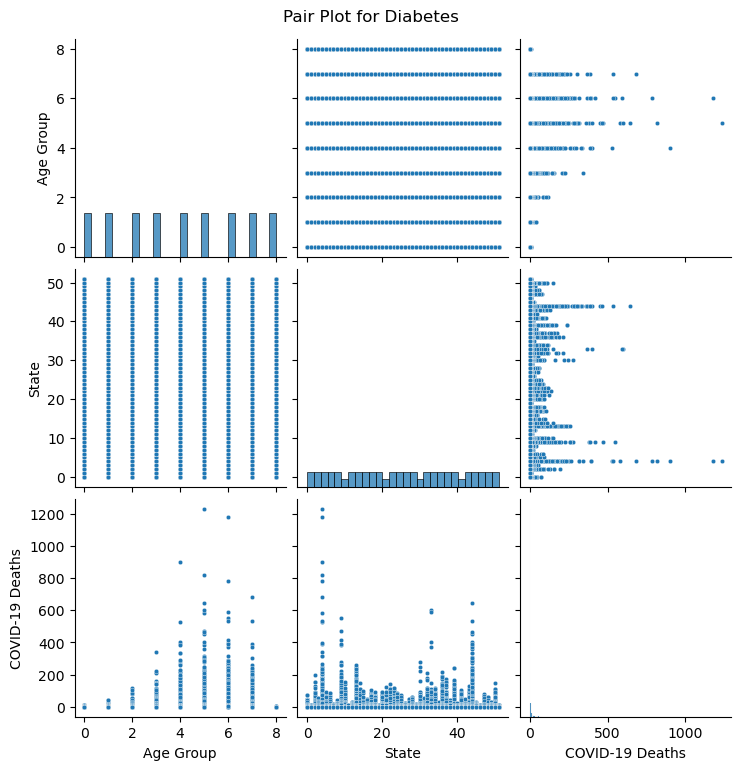

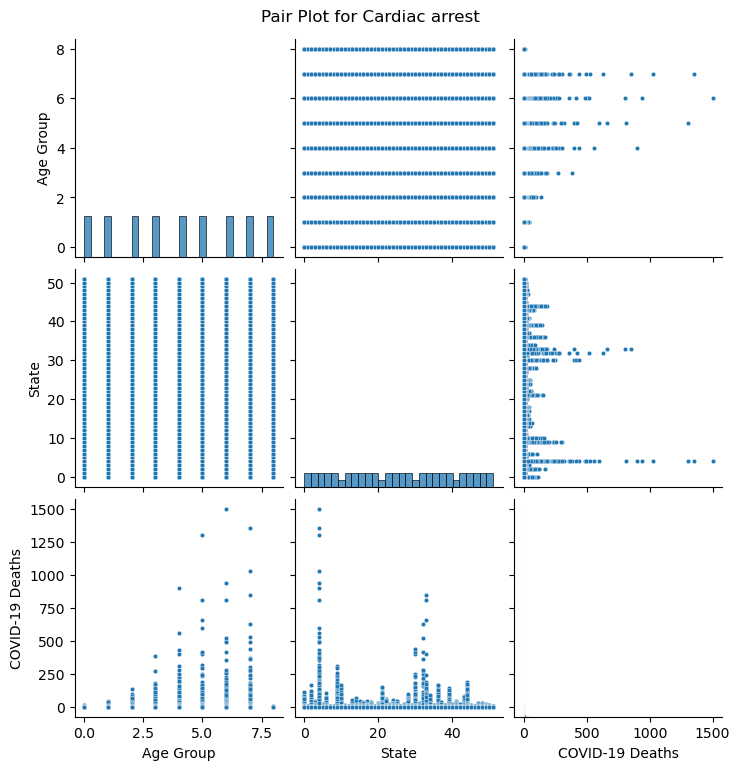

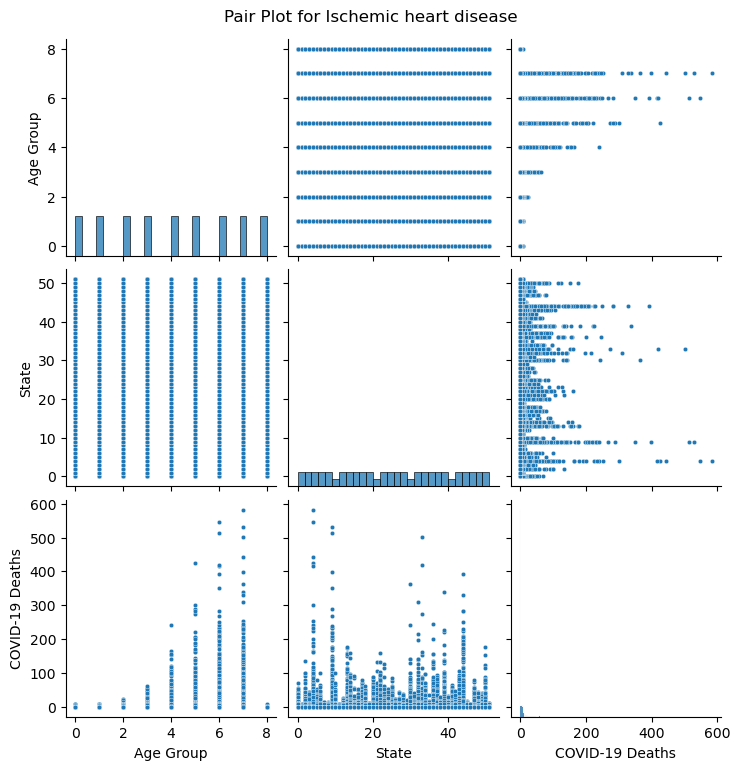

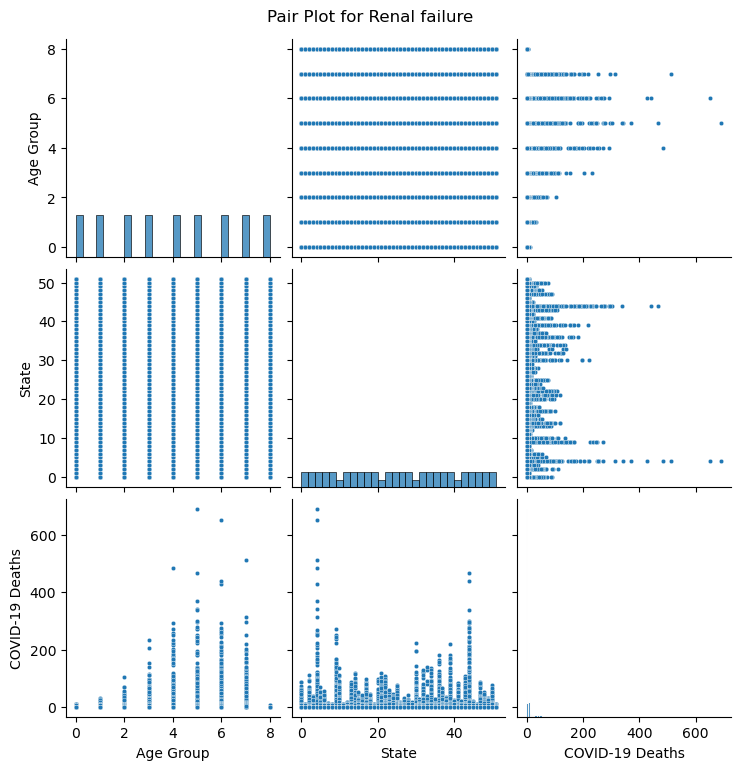

In [114]:
# Select columns to pair with
pair_plot_columns = ['Age Group', 'State', 'COVID-19 Deaths']

# Filter the dataframe for the selected conditions
conditions_for_pair_plot = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Diabetes', 'Cardiac arrest', 'Ischemic heart disease', 'Renal failure']
df_pair_plot_conditions = df_selected[df_selected['Condition'].isin(conditions_for_pair_plot)]

# Encode categorical variables for the pair plot within this section
df_pair_plot_encoded = df_pair_plot_conditions.copy()
df_pair_plot_encoded['State'] = df_pair_plot_encoded['State'].astype('category').cat.codes
df_pair_plot_encoded['Age Group'] = df_pair_plot_encoded['Age Group'].astype('category').cat.codes

# Use a for loop to create separate pair plots for each condition
for condition in conditions_for_pair_plot:
    df_condition = df_pair_plot_encoded[df_pair_plot_encoded['Condition'] == condition]
    g = sns.pairplot(df_condition[pair_plot_columns], plot_kws={'s': 10})
    plt.suptitle(f'Pair Plot for {condition}', y=1.02)
    pair_plot_condition = plt.gcf()
    plt.show()
    
    # Export the pair plot
    pair_plot_condition.savefig(os.path.join(path, '04 Analysis', 'Visualizations', f'pair_plot_condition{condition.replace(" ", "_").lower()}.png'))

#### Insights from the Pair Plotsgroups and conditions.

#### Distributions:
Age Group: Older Age Group have Higher COVID-19 Deaths counts.

COVID-19: varied seriousness across conditions.

#### Relationships:
Age Group vs. COVID-19 Deaths: Positive trend, older age group have higher COVID-19 Deaths counts.

Condition vs. COVID-19 Deaths: Higher deaths counts for specific conditions.

#### Variable to Explore Further
Age Group and Specific Conditions:

Why: Understand which condition impact on older populations.

State and COVID-19 Deaths:

Why: Explore regional difference in COVID-19 impact.

Condition Group/Condition and COVID-19 Death:

Why: Explore high-risk condition groups and conditions.

## Categorical Plots

#### Create categorical plot for COVID-19 Deaths with Condition Group and Age Group columns

<Figure size 1200x800 with 0 Axes>

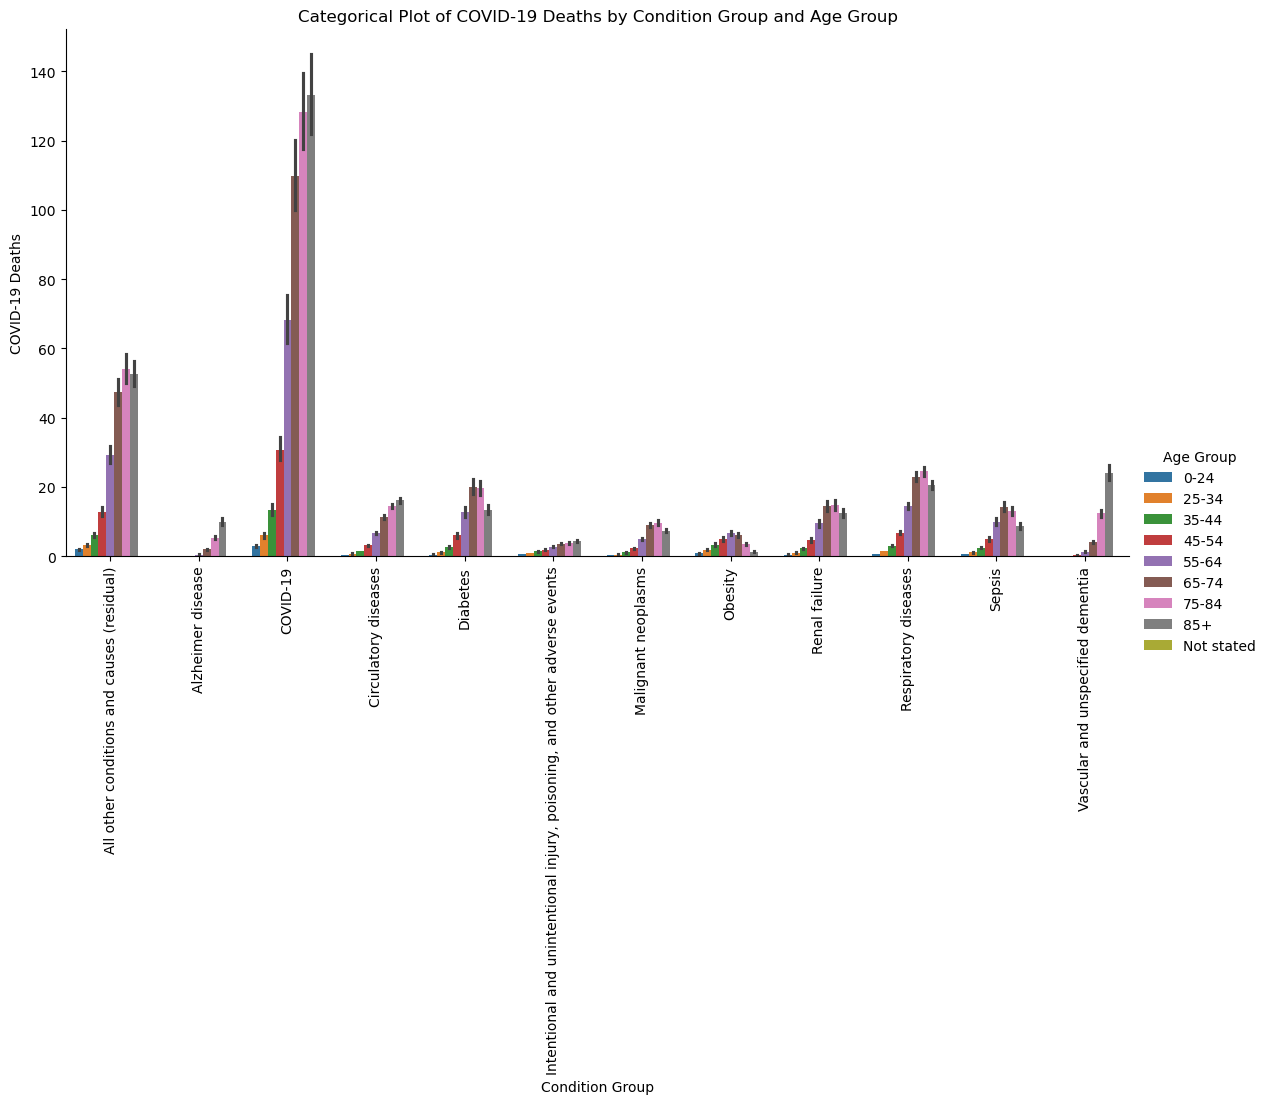

In [125]:
# Categorical plot for COVID-19 Deaths by Condition Group and Age Group
plt.figure(figsize=(12, 8))
sns.catplot(x='Condition Group', y='COVID-19 Deaths', hue='Age Group', data=df, kind='bar', height=6, aspect=2)
plt.title('Categorical Plot of COVID-19 Deaths by Condition Group and Age Group')
plt.xticks(rotation=90)
catplot_conditiongroup_agegroup_deaths = plt.gcf()
plt.show()

#### Categorical plots for specific medical conditions for "Condition" column.

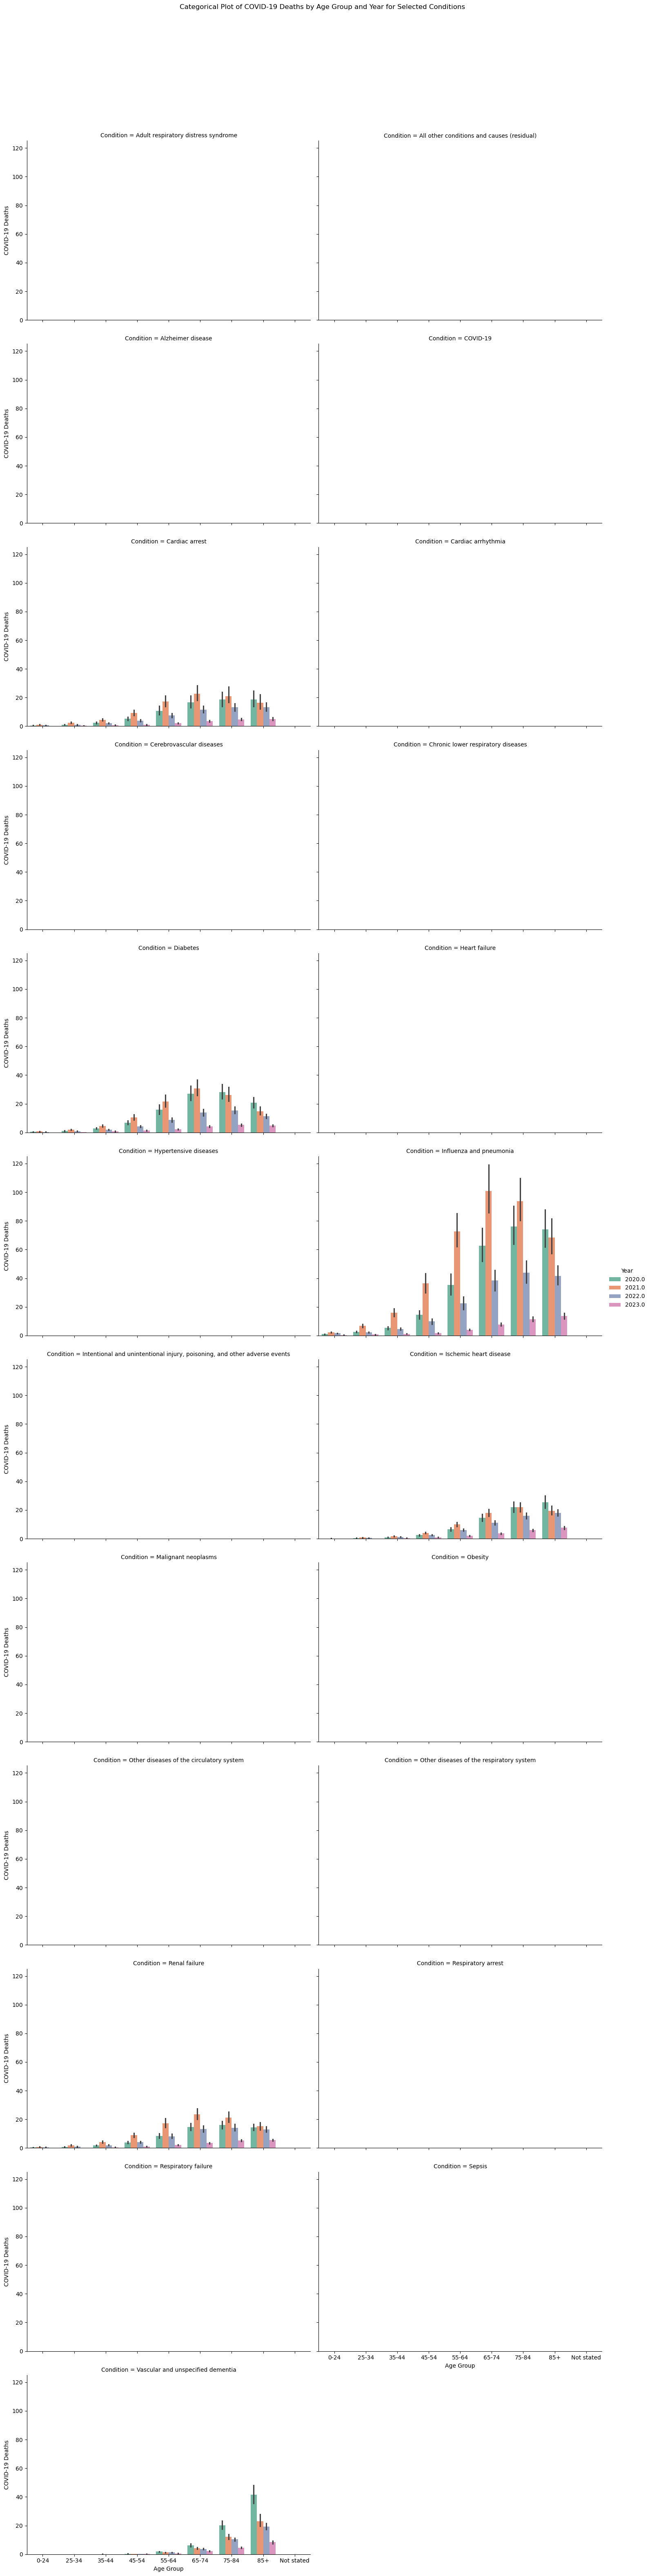

In [128]:
# Select columns and conditions for the plot
categorical_columns = ['Year', 'Age Group', 'COVID-19 Deaths']
conditions_for_categorical_plot = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Diabetes', 'Cardiac arrest', 'Ischemic heart disease', 'Renal failure']
df_categorical_conditions = df_selected[df_selected['Condition'].isin(conditions_for_categorical_plot)]

# Create a categorical plot
g = sns.catplot(
    x='Age Group', 
    y='COVID-19 Deaths', 
    hue='Year', 
    col='Condition', 
    col_wrap=2,
    data=df_categorical_conditions, 
    kind='bar', 
    height=5,
    aspect=1.5,
    palette='Set2')
g.fig.suptitle('Categorical Plot of COVID-19 Deaths by Age Group and Year for Selected Conditions', y=1.05)
catplot_selected_conditions = plt.gcf()
plt.show()

Insights from the Categorical Plots

COVID-19 Deaths By Condition Group and Age Group
:
Higher Death counts in specific Condition Groups: Some condition groups, like influenza and pnneumonia and cardiovascular diseases, have higher COVID-19 deaths counts compared to others.

Age Group Influence: Older age group have higher death counts across various condition groups.

COVID-19 Deaths by Age Group and Year for specific condi
tions:
Temporal Trends: Specific conditions have variantion death counts over different yeras.

Condition Specific Insights: Conditions like diabetes, ischemic heart disease, and renal failure consistenly show higher death counts across olger age groups in different years.

### Answers to questions

1) What are the most common conditions contributing to COVID-19 deaths is different age group?
From the categorical plots, influenza and pneumonia and cardiovascular diseases are most common conditions to COVID-19 deaths across all age groups, specially older age groups affected. Some conditions like ischemic heart disease, diabadets, and renal failure are also high COVID-19 deaths in older age groups.
2) Which group have highest death and which conditions contributing to COVID-19 deaths?
The distribution shows older age groups have higher death counts for almost all conditions. Specially, conditions such as diabetes, ischenic heart disease, and cerebrovascular diseases impact older age groups.
3) Which states have highest specific conditions contributing to COVID-19 deaths?
Further analysis is needed.
4) What are the regional patterns and which region have highest COVID-19 deaths?
Further analysis is needed.
5) Which month or season has highest COVID-19 deaths?
Further analysis is needed.
6) How have COVID-19 death rates and contributing conditions changed over time?
The scatterplot of COVID-19 Deaths vs. Year represents slighly decrease in death rates over time.
7) What factor are most predictive of COVID-19 death rates?
Based on analysis, the most predictive factors are Number of Mentions of conditins, Age Group and specific high-risk conditions such as respiratory and cariovasular diseases. These factors represents strong correlations with COVID-19 death rates.


### Hypothesis

#### Hypothesis 1: If the age group is older, then the COVID-19 death count will be significantly higher compared to younger age groups across various conditions.

The scatterplots and pair plots represents older population consistently show higher death counts for multiple conditions.This is also supported stong positive correlations between Age Group and COVID-19 Deaths.


#### Hypothesis 2: If condition like influenza and pneumonia, vascular and unspecified dementia, diabetes, ischemic heart disease, or renal failure, then they will have a higher COVID-19 death rate compared to with other conditions.

The correlation analysis and scatterplots represents very strong positive correlations between COVID-19 Deaths and these specific conditions and also higher risk of COVID-19 deaths.


#### Exporting all Visualizations

In [142]:
# Export heatmaps
heatmap_corr_matrix.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_corr_matrix.png'))
# Export Scatterplots
scatterplot_mentions_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_mentions_deaths.png'))
scatterplot_agegroup_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_agegroup_deaths.png'))
scatterplot_mentions_agegroup.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_mentions_agegroup.png'))
scatterplot_condition_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_condition_deaths.png'))
scatterplot_year_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_year_deaths.png'))
scatterplot_influenza_pneumonia.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_influenza_pneumonia.png'))
scatterplot_vascular_dementia.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_vascular_dementia.png'))
scatterplot_ischemic_heart_disease.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_ischemic_heart_disease.png'))
scatterplot_renal_failure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_renal_failure.png'))
scatterplot_respiratory_distress.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_respiratory_distress.png'))
scatterplot_respiratory_distress_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_respiratory_distress_year.png'))
scatterplot_covid19_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_covid19_year.png'))
scatterplot_diabetes_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_diabetes_year.png'))
scatterplot_influenza_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_influenza_year.png'))

# Export Pair Plots
pair_plot_entire_dataset.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_plot_entire_dataset.png'))

# Export Categorical Plots
catplot_conditiongroup_agegroup_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_conditiongroup_agegroup_deaths.png'))
catplot_selected_conditions.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_selected_conditions.png'))

In [146]:
#Saving cleaned data for further analysis:
# Exporting "df" dataframe to CSV
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid_clean_new.csv'), index=False)